In [ ]:
!pip install shap
!pip install treeinterpreter
!pip install six

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.1 MB/s eta 0:00:00


---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>


En resumen, feature selection, también llamado como selección de mejores características o atributos, es el proceso de seleccionar un subconjunto de características pertinentes (variables, predictores) para su uso en construcción de modelos. Las técnicas de feature selection son utilizadas por cuatro razones:
* Simplificación de modelos con el fin de hacerlas más sencillas de interpretar para los usuarios/investigadores.
* Menor tiempo de entrenamiento.
* Evitar la maldición de la dimensionalidad:
* Generalización realzada por reducir _overfitting_ (formalmente, reducción de varianza).


### TODO EN AI ES UNA ECUACIÓN.

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Coursera/features/data/'

filename = 'pima-indians-diabetes.data.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(f"{path}{filename}")

# CRTIERIOS. SELECCIÓN DE CARACTERÍSTICAS

### ELIMINAR ALTA CORRELACIÓN.

### ELIMINAR SOBRE DIMENSIONALIDAD ==> COSTO COMPUTACIONAL Y POR OVERFITTING

### MEJORAR TIEMPOS DE ENTRENAMIENTOS.

### GENERAR MODELOS INTERPRETABLES PARA LAS PERSONAS

### from scipy.stats import spearmanr, kendalltau ==> CORRELACIÓN NO LINEAL

### import statsmodels.formula.api as smf  ==> REGRESIONES LINEALES CON DATOS ESTADÍSTICOS AVANZADOS

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:18:18   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.0

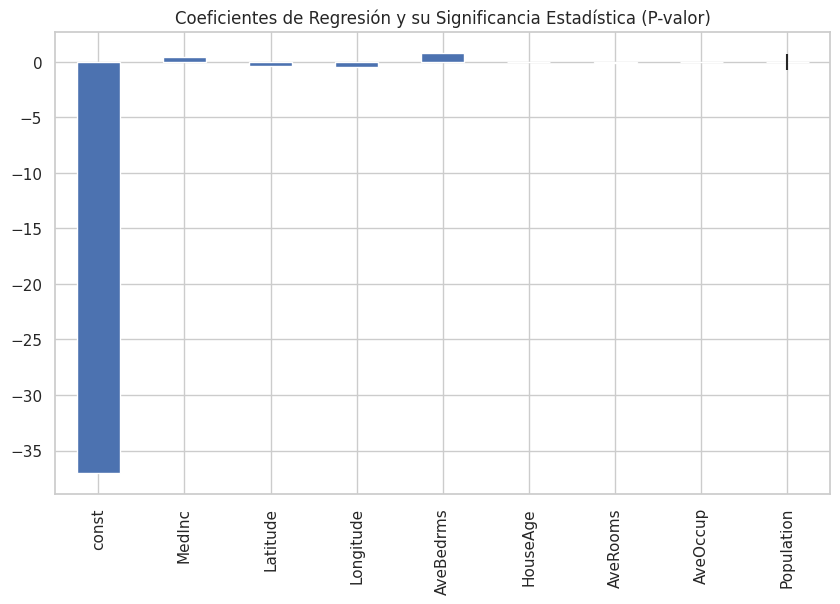

In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau ## NO LINEALES
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración para visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Cargar datasets
# Para regresión usaremos el dataset de California Housing
california = fetch_california_housing()
X_california = pd.DataFrame(california.data, columns=california.feature_names)
y_california = pd.Series(california.target, name='target')

# Para clasificación usaremos el dataset de Cáncer de Mama
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = pd.Series(cancer.target, name='target')

# 2. Dividir los datasets en conjunto de entrenamiento y prueba
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

# 3. Regresión Lineal con Statsmodels
# Agregar una constante (intercepto) para statsmodels
X_train_california_sm = sm.add_constant(X_train_california)
X_test_california_sm = sm.add_constant(X_test_california)

# Crear y entrenar el modelo
modelo_sm = sm.OLS(y_train_california, X_train_california_sm)  ## REGRESIÓN LINEAL CON STATS MODELS == LinearRegression() de scikit learn
resultados = modelo_sm.fit()

# Imprimir el resumen del modelo
print(resultados.summary())

###verificamos resultados

# Predecir y calcular métricas de rendimiento
y_pred_sm = resultados.predict(X_test_california_sm)

# Calcular MSE, MAE y R^2
mse_sm = mean_squared_error(y_test_california, y_pred_sm)
mae_sm = mean_absolute_error(y_test_california, y_pred_sm)
r2_sm = resultados.rsquared

print(f"\nMétricas de evaluación para la Regresión Lineal con Statsmodels:")
print(f"MSE: {mse_sm:.4f}")
print(f"MAE: {mae_sm:.4f}")
print(f"R^2: {r2_sm:.4f}")

# Visualización de los coeficientes y su significancia
coeficientes = pd.DataFrame({'Coeficientes': resultados.params, 'P-valor': resultados.pvalues})
coeficientes.sort_values(by='P-valor', ascending=True, inplace=True)
coeficientes.plot(kind='bar', y='Coeficientes', yerr='P-valor', legend=False)
plt.title('Coeficientes de Regresión y su Significancia Estadística (P-valor)')
plt.show()



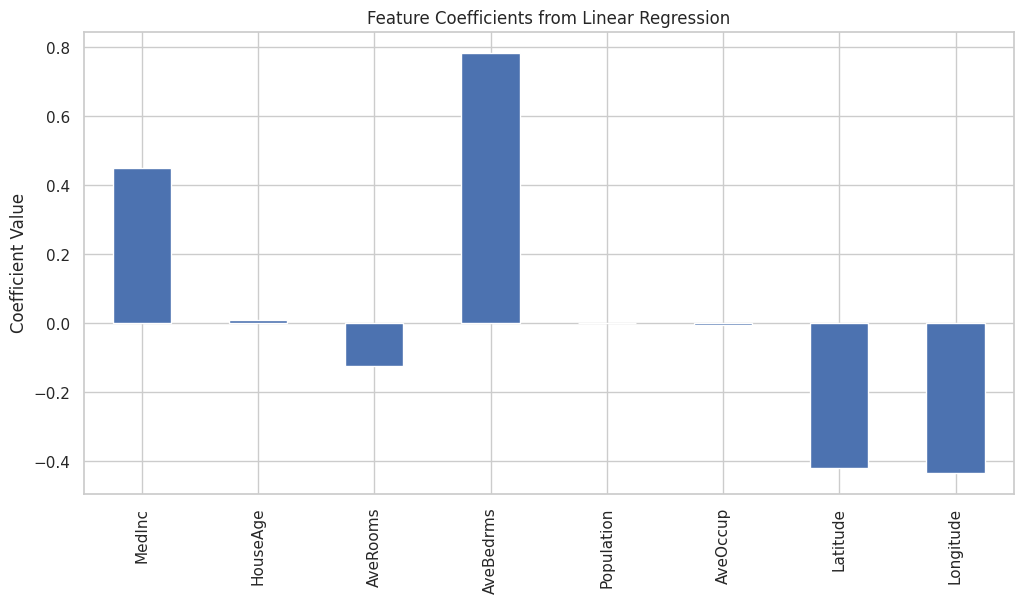

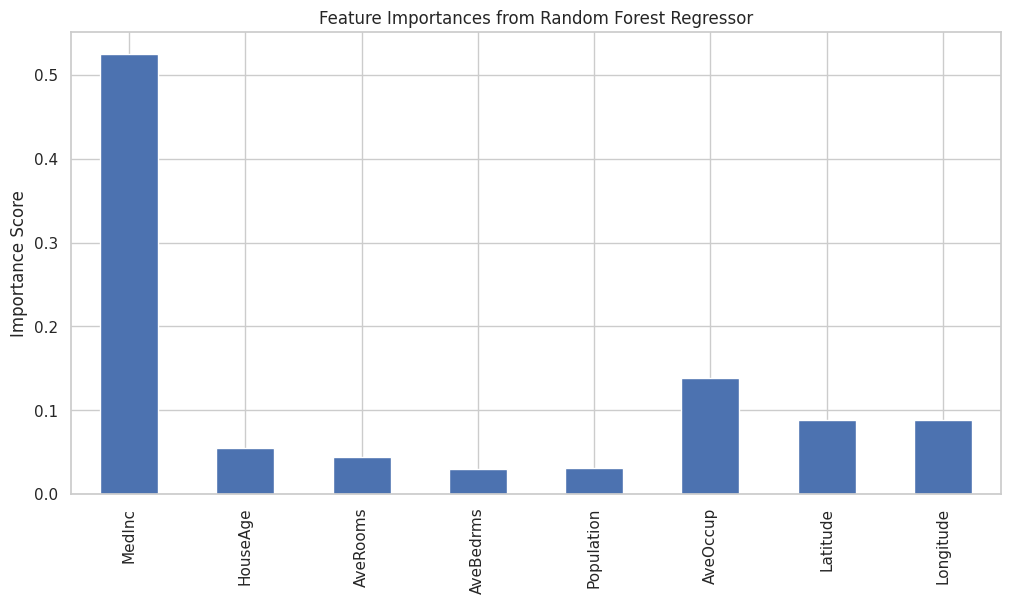

In [ ]:
# Step 1: Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 2: Load the California Housing dataset
california = fetch_california_housing()
X, y = california.data, california.target
feature_names = california.feature_names

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 5: Get the coefficients of the Linear Regression model
coefficients = pd.Series(linear_model.coef_, index=feature_names)

# Step 6: Fit a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Get the feature importances from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=feature_names)

# Step 8: Plot the coefficients from the Linear Regression model
plt.figure(figsize=(12, 6))
coefficients.plot(kind='bar')
plt.title('Feature Coefficients from Linear Regression')
plt.ylabel('Coefficient Value')
plt.show()

# Step 9: Plot the feature importances from the Random Forest model
plt.figure(figsize=(12, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest Regressor')
plt.ylabel('Importance Score')
plt.show()


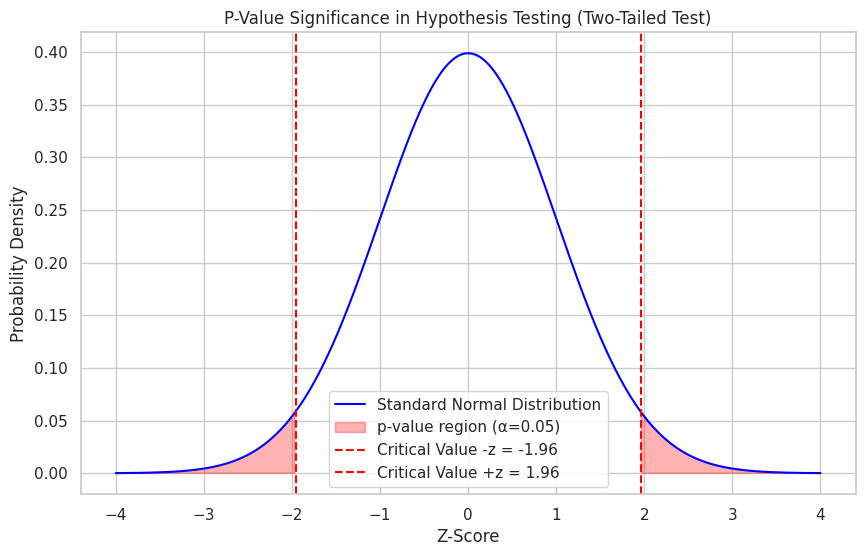

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range for the x-axis
x = np.linspace(-4, 4, 1000)

# Standard normal distribution
y = norm.pdf(x)

# Significance level
alpha = 0.05
z_critical = norm.ppf(1 - alpha / 2)  # Two-tailed test

# Plotting the standard normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='blue')

# Shade the critical regions
plt.fill_between(x, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.3, label='p-value region (α=0.05)')

# Annotate the critical value points
plt.axvline(-z_critical, color='red', linestyle='--', label=f'Critical Value -z = {-z_critical:.2f}')
plt.axvline(z_critical, color='red', linestyle='--', label=f'Critical Value +z = {z_critical:.2f}')

# Add labels and title
plt.title('P-Value Significance in Hypothesis Testing (Two-Tailed Test)')
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.legend()

plt.show()


r2 = 0.613.  Significa 61% de Var de la variable objetivo es explicada por la varianza de las variables del dataset


P-value = métrica que permite estimar la probabilidad de que los resultados sean debidos al azar y determinar si los hallazgos de un experimento son estadísticamente significativos. P<0.05.


Si el p-value es mayor a 0.05 ==> resultados se deban a ruido o simplemente al azar.

En esta lección, se muestran varias métricas de evaluación de algoritmos diferentes para problemas de Machine Learning de clasificación y regresión. En cada código, el conjunto de datos se descarga directamente del repositorio de UCI Machine Learning.
* **Clasificación**: se usará el conjunto de datos de Pima Indians Diabetes. Este es un problema de clasificación binaria donde todas las características de entrada son numéricas.

## preg (Número de embarazos):

### Coeficiente: 0.064544

Interpretación: Por cada embarazo adicional, las probabilidades logarítmicas de tener diabetes aumentan aproximadamente en 0.0645, lo que indica una asociación positiva con la diabetes.

## plas (Concentración de glucosa plasmática después de 2 horas en una prueba de tolerancia a la glucosa oral):

### Coeficiente: 0.034092

Interpretación: Por cada unidad de aumento en la concentración de glucosa plasmática, las probabilidades logarítmicas de tener diabetes aumentan en aproximadamente 0.0341. Esto sugiere que niveles más altos de glucosa plasmática están asociados con un mayor riesgo de diabetes.

## pres (Presión arterial diastólica en mm Hg):

### Coeficiente: -0.013873

Interpretación: Por cada unidad de aumento en la presión arterial diastólica, las probabilidades logarítmicas de tener diabetes disminuyen en aproximadamente 0.0139. Esto indica una leve asociación negativa, aunque podría no ser significativa.

## skin (Grosor del pliegue cutáneo del tríceps en mm):

### Coeficiente: 0.003283

Interpretación: Por cada unidad de aumento en el grosor del pliegue cutáneo del tríceps, las probabilidades logarítmicas de tener diabetes aumentan en 0.0033. Esto muestra una débil asociación positiva con la diabetes.

## test (Insulina sérica a las 2 horas en mu U/ml):

### Coeficiente: -0.001803

Interpretación: Por cada unidad de aumento en la insulina sérica a las 2 horas, las probabilidades logarítmicas de tener diabetes disminuyen en aproximadamente 0.0018. Esto sugiere una asociación muy débil negativa.

## mass (Índice de Masa Corporal (IMC) - Peso en kg/(Altura en m)^2):

### Coeficiente: 0.102617

Interpretación: Por cada unidad de aumento en el IMC, las probabilidades logarítmicas de tener diabetes aumentan en aproximadamente 0.1026. Esto indica una asociación positiva más fuerte, lo que significa que un IMC más alto está asociado con un mayor riesgo de diabetes.

## pedi (Función de Pedigrí de Diabetes):

### Coeficiente: 0.627304

Interpretación: Por cada unidad de aumento en la función de pedigrí de diabetes (una función que puntúa la probabilidad de diabetes en función del historial familiar), las probabilidades logarítmicas de tener diabetes aumentan en aproximadamente 0.6273. Esta es una asociación positiva fuerte, lo que implica que un pedigrí de diabetes más alto aumenta significativamente el riesgo.

## age (Edad en años):

### Coeficiente: 0.037062

Interpretación: Por cada año adicional de edad, las probabilidades logarítmicas de tener diabetes aumentan en aproximadamente 0.0371. Esto sugiere que una mayor edad está asociada con una mayor probabilidad de diabetes.

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Step 2: Load the dataset
path = '/content/drive/MyDrive/Colab Notebooks/notebooks ML1/DATA/'
filename = 'pima-indians-diabetes.data.csv'
df_cla = pd.read_csv(f"{path}{filename}", names=names)
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df_cla = pd.read_csv(f"{path}{filename}", names=names)

# Convertir DataFrame a un array de valores
array = df_cla.values

# Step 3: Split the data into features (X_cla) and target (Y_cla)
X_cla = array[:, 0:8]
Y_cla = array[:, 8]

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cla, Y_cla, test_size=0.2, random_state=42)

# Step 5: Fit a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 6: Get the feature importances from the Random Forest model
importances = rf_classifier.feature_importances_

# Step 7: Create a pandas series with the feature names and their corresponding importances
feature_importances = pd.Series(importances, index=names[:-1])

# Step 8: Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/notebooks ML1/DATA/pima-indians-diabetes.data.csv'

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Step 2: Load the dataset
path = '/content/drive/MyDrive/Colab Notebooks/notebooks ML1/DATA/'
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df_cla = pd.read_csv(f"{path}{filename}", names=names)

# Convertir DataFrame a un array de valores
array = df_cla.values

# Step 3: Split the data into features (X_cla) and target (Y_cla)
array = df_cla.values
X_cla = array[:, 0:8]
Y_cla = array[:, 8]

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cla, Y_cla, test_size=0.2, random_state=42)

# Step 5: Fit a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 6: Get the feature importances from the Random Forest model
importances = rf_classifier.feature_importances_

# Step 7: Create a pandas series with the feature names and their corresponding importances
feature_importances = pd.Series(importances, index=names[:-1])

# Step 8: Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/notebooks ML1/DATA/pima-indians-diabetes.data.csv'

Predicción del modelo: [[0.69 0.31]]
Valor esperado (Bias): [[0.65462541 0.34537459]]
Contribuciones de cada característica a la predicción:
      Contribución Clase 0  Contribución Clase 1
preg                0.0091               -0.0091
plas                0.1948               -0.1948
pres                0.0356               -0.0356
skin                0.0019               -0.0019
test               -0.0618                0.0618
mass               -0.0245                0.0245
pedi                0.0184               -0.0184
age                -0.1381                0.1381


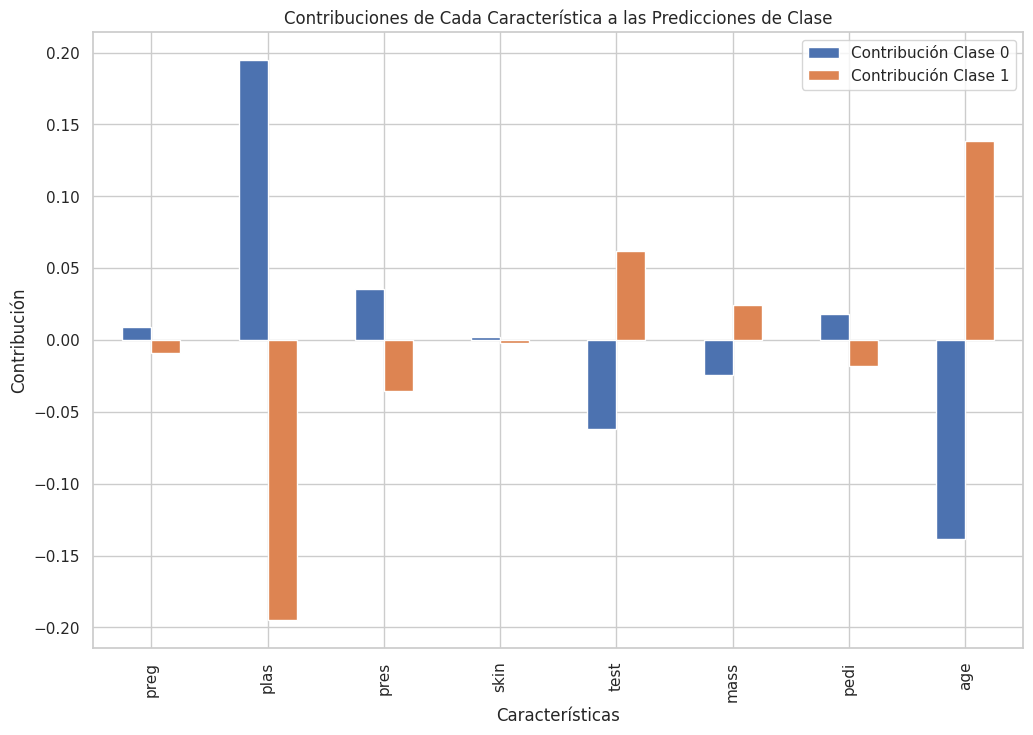

In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from treeinterpreter import treeinterpreter as ti #FEAUTRE IMPORTANCES IDEAL EN RANDOM FOREST
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning Coursera/features/data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# Leer el archivo CSV
df_cla = pd.read_csv(path, names=names)

# Convertir DataFrame a un array de valores
array = df_cla.values  # Definir 'array' aquí

# Step 3: Dividir los datos en características (X_cla) y el objetivo (Y_cla)
X_cla = array[:, 0:8]  # Características
Y_cla = array[:, 8]    # Objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_cla, X_test_cla, Y_train_cla, Y_test_cla = train_test_split(X_cla, Y_cla, test_size=0.2, random_state=42)

# Entrenar el modelo de RandomForest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_cla, Y_train_cla)

# Utilizar Treeinterpreter para descomponer la predicción
instance = X_test_cla[0:1]  # Ejemplo con la primera muestra del conjunto de prueba
prediction, bias, contributions = ti.predict(rf_clf, instance)

# Imprimir los resultados
print("Predicción del modelo:", prediction)
print("Valor esperado (Bias):", bias)
print("Contribuciones de cada característica a la predicción:")

# Crear un DataFrame para visualizar mejor las contribuciones para ambas clases
contrib_df = pd.DataFrame(contributions[0], columns=['Contribución Clase 0', 'Contribución Clase 1'])
contrib_df.index = names[:8]  # Nombres de las características
contrib_df = contrib_df.round(4)  # Redondear para mejor visualización

print(contrib_df)

# Visualizar las contribuciones de cada característica para cada clase
contrib_df.plot(kind='bar', figsize=(12, 8))
plt.title('Contribuciones de Cada Característica a las Predicciones de Clase')
plt.xlabel('Características')
plt.ylabel('Contribución')
plt.show()


In [ ]:
contributions[0]


array([[ 0.00914379, -0.00914379],
       [ 0.19476654, -0.19476654],
       [ 0.03558926, -0.03558926],
       [ 0.00187005, -0.00187005],
       [-0.06180812,  0.06180812],
       [-0.02447225,  0.02447225],
       [ 0.01842756, -0.01842756],
       [-0.13814224,  0.13814224]])

### CATBOOST. Acepta variables categóricas

### XGBoost. No acepta variables categóricas. MUY POTENTE. REQUIERE FINE TUNING.(Boosting, no promedia, vertical)

### Random forest. No acepta variables categóricas. No requiere fine tuning (ensemble promedio baggin)

### one hot endoding. get dummies ==> Si tengo variables categoricas (No binarias)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

Predicción del modelo: [[0.03 0.97]]
Valor esperado (Bias): [[0.36793407 0.63206593]]
Contribuciones de cada característica a la predicción:
                         Contribución Clase 0  Contribución Clase 1
worst area                            -0.0746                0.0746
worst concave points                  -0.0570                0.0570
mean concave points                   -0.0474                0.0474
worst radius                          -0.0424                0.0424
worst perimeter                       -0.0236                0.0236
mean area                             -0.0203                0.0203
mean concavity                        -0.0195                0.0195
mean radius                           -0.0174                0.0174
worst compactness                     -0.0090                0.0090
worst texture                         -0.0084                0.0084
mean perimeter                        -0.0083                0.0083
mean texture                          -0.00

<Figure size 1000x800 with 0 Axes>

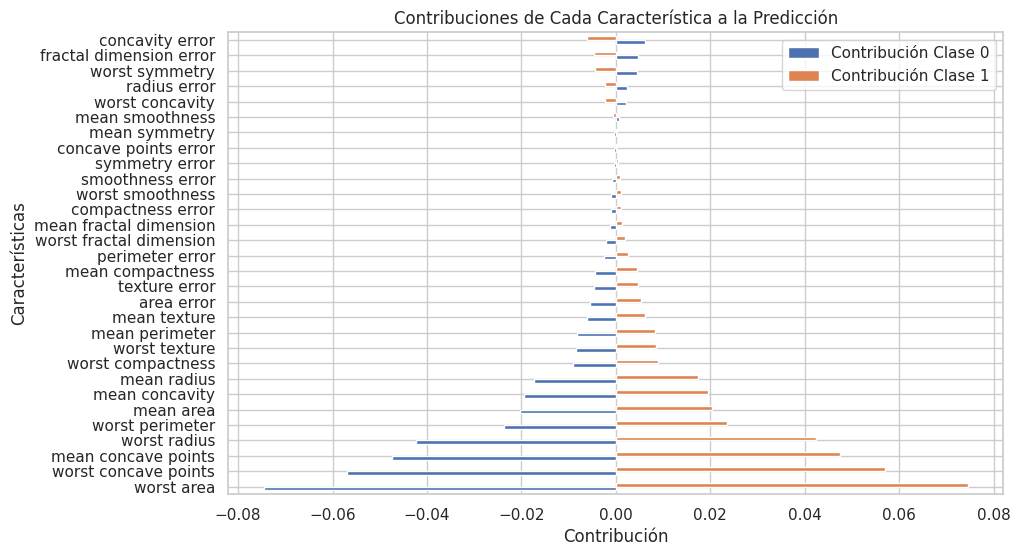

In [ ]:
# Importar librerías necesarias
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Cargar el dataset de ejemplo (Cáncer de Mama)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de RandomForest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Utilizar Treeinterpreter para descomponer la predicción
instance = X_test.iloc[0:1]  # Ejemplo con la primera muestra del conjunto de prueba
prediction, bias, contributions = ti.predict(rf_clf, instance)

# Imprimir los resultados
print("Predicción del modelo:", prediction)
print("Valor esperado (Bias):", bias)
print("Contribuciones de cada característica a la predicción:")

# Crear un DataFrame para visualizar mejor las contribuciones
# The contributions array has two columns: contributions for class 0 and class 1
# We need to specify column names for both
contrib_df = pd.DataFrame(contributions[0], columns=['Contribución Clase 0', 'Contribución Clase 1'])
contrib_df.index = X.columns
contrib_df = contrib_df.round(4)  # Redondear para mejor visualización
contrib_df = contrib_df.sort_values(by='Contribución Clase 1', ascending=False) # Sort by contributions to class 1, adjust as needed

print(contrib_df)

# Visualizar las contribuciones de forma gráfica
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
contrib_df.plot(kind='barh', legend=True) # Show legend to distinguish contributions to different classes
plt.title('Contribuciones de Cada Característica a la Predicción')
plt.xlabel('Contribución')
plt.ylabel('Características')
plt.show()

* **Regresión**: se usará el conjunto de datos Boston House Price. Este es un problema de regresión donde todas las características de entrada también son numéricas. En esta práctica lo trabajaremos directamente desde scikit-learn

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:18:48   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.0

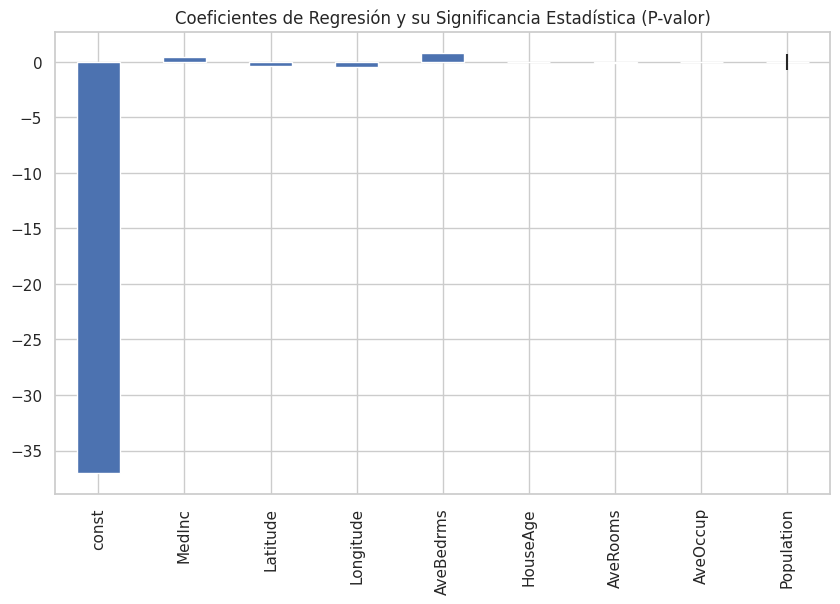

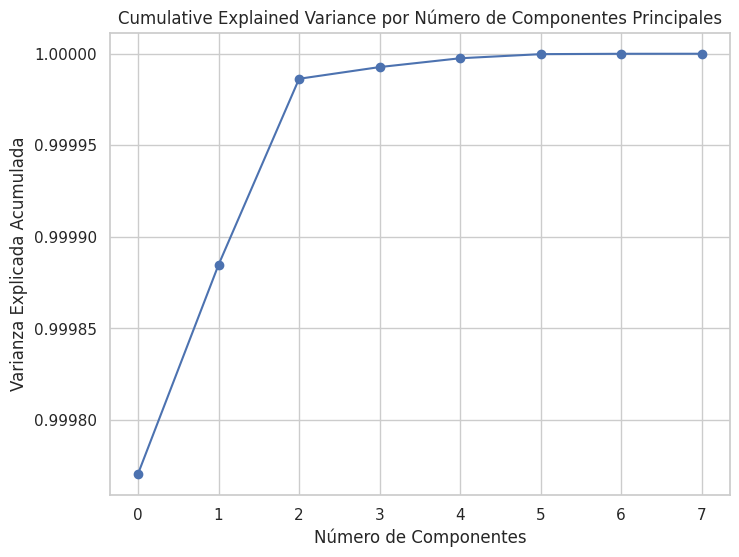

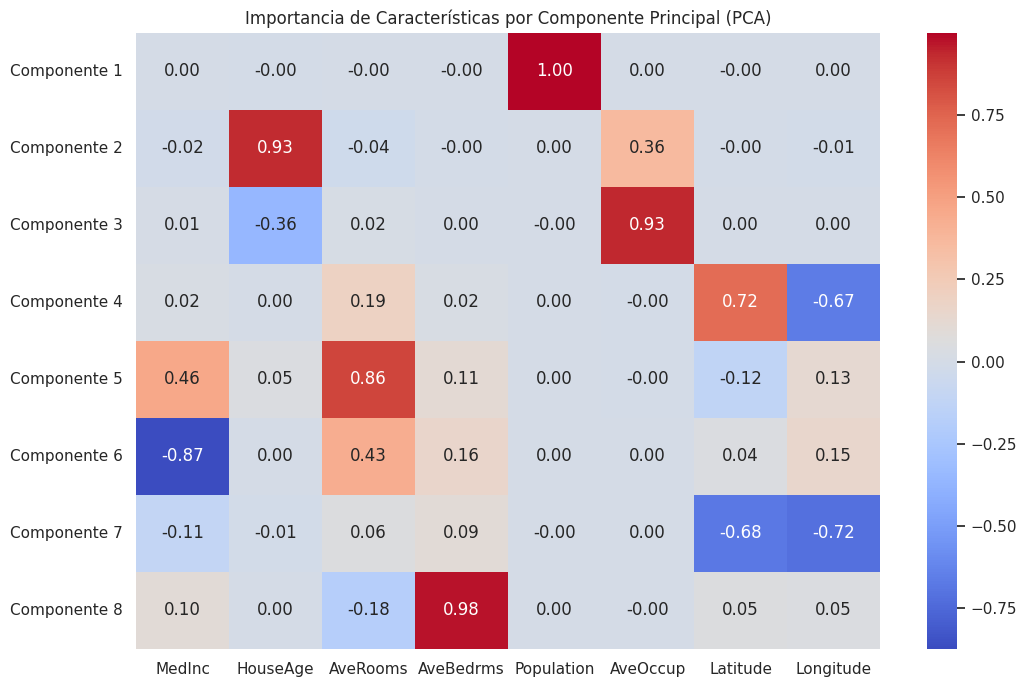

In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
import shap
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración para visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Cargar datasets
# Para regresión usaremos el dataset de California Housing
california = fetch_california_housing()
X_california = pd.DataFrame(california.data, columns=california.feature_names)
y_california = pd.Series(california.target, name='target')

# Para clasificación usaremos el dataset de Cáncer de Mama
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = pd.Series(cancer.target, name='target')

# 2. Dividir los datasets en conjunto de entrenamiento y prueba
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)

# 3. Regresión Lineal con Statsmodels
# Agregar una constante (intercepto) para statsmodels
X_train_california_sm = sm.add_constant(X_train_california)
X_test_california_sm = sm.add_constant(X_test_california)

# Crear y entrenar el modelo
modelo_sm = sm.OLS(y_train_california, X_train_california_sm)
resultados = modelo_sm.fit()

# Imprimir el resumen del modelo
print(resultados.summary())

# Predecir y calcular métricas de rendimiento
y_pred_sm = resultados.predict(X_test_california_sm)

# Calcular MSE, MAE y R^2
mse_sm = mean_squared_error(y_test_california, y_pred_sm)
mae_sm = mean_absolute_error(y_test_california, y_pred_sm)
r2_sm = resultados.rsquared

print(f"\nMétricas de evaluación para la Regresión Lineal con Statsmodels:")
print(f"MSE: {mse_sm:.4f}")
print(f"MAE: {mae_sm:.4f}")
print(f"R^2: {r2_sm:.4f}")

# Visualización de los coeficientes y su significancia
coeficientes = pd.DataFrame({'Coeficientes': resultados.params, 'P-valor': resultados.pvalues})
coeficientes.sort_values(by='P-valor', ascending=True, inplace=True)
coeficientes.plot(kind='bar', y='Coeficientes', yerr='P-valor', legend=False)
plt.title('Coeficientes de Regresión y su Significancia Estadística (P-valor)')
plt.show()

# 4. PCA para la importancia de características
pca = PCA(n_components=X_train_california.shape[1])  # PCA con el mismo número de componentes que características originales
X_pca = pca.fit_transform(X_train_california)

# Gráfica de Varianza Explicada
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance por Número de Componentes Principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Importancia de características por componente principal
pca_components = pd.DataFrame(pca.components_, columns=X_train_california.columns)
pca_components.index = [f'Componente {i+1}' for i in range(len(pca_components))]

# Gráfico de Importancia de Características por Componente Principal
plt.figure(figsize=(12, 8))
sns.heatmap(pca_components, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Importancia de Características por Componente Principal (PCA)')
plt.show()



<a id="section2"></a>
# <font color="#004D7F"> 2. Técnicas de Feature selection</font>

la selección de las funciones correctas en sus datos puede significar la diferencia entre un rendimiento mediocre con largos tiempos de entrenamiento y un gran rendimiento con tiempos de entrenamiento cortos. Como dice el principio de Occam's Razor:

*Los modelos más simples son los mejores.*

In [ ]:
#!pip install  graphviz
#!pip install pydotplus

### Dataset o X o df.corr()  POR DEFECTO EVALUA LA CORRELACIÓN DE PEARSON ==> LINEAL

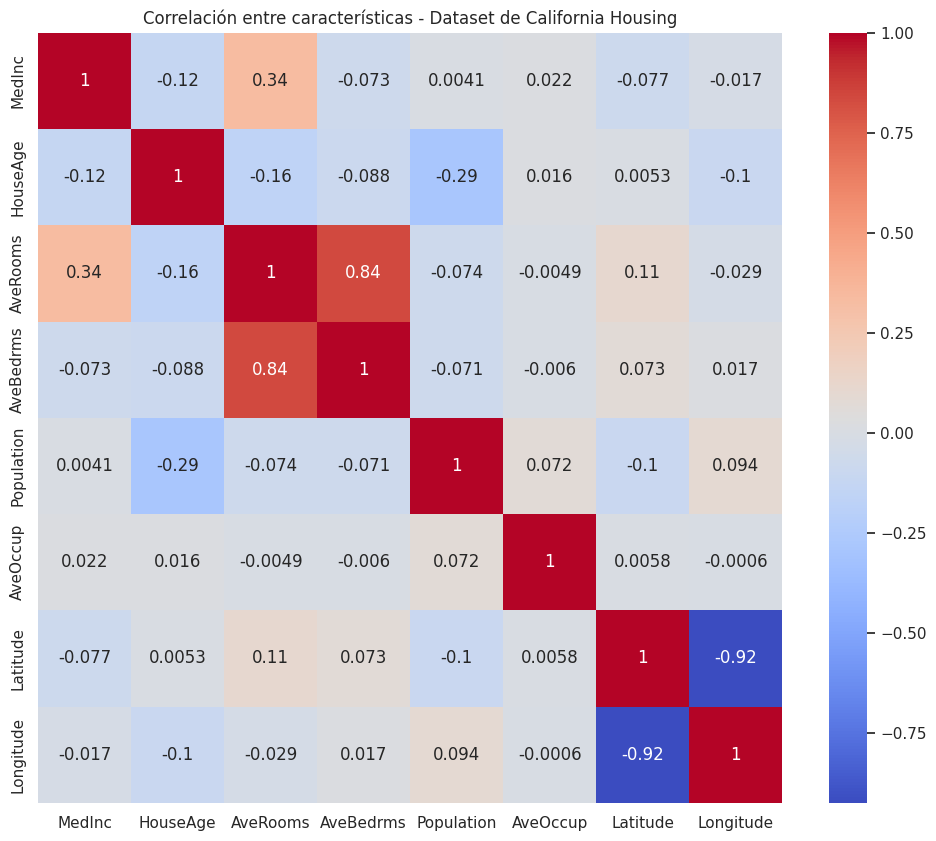

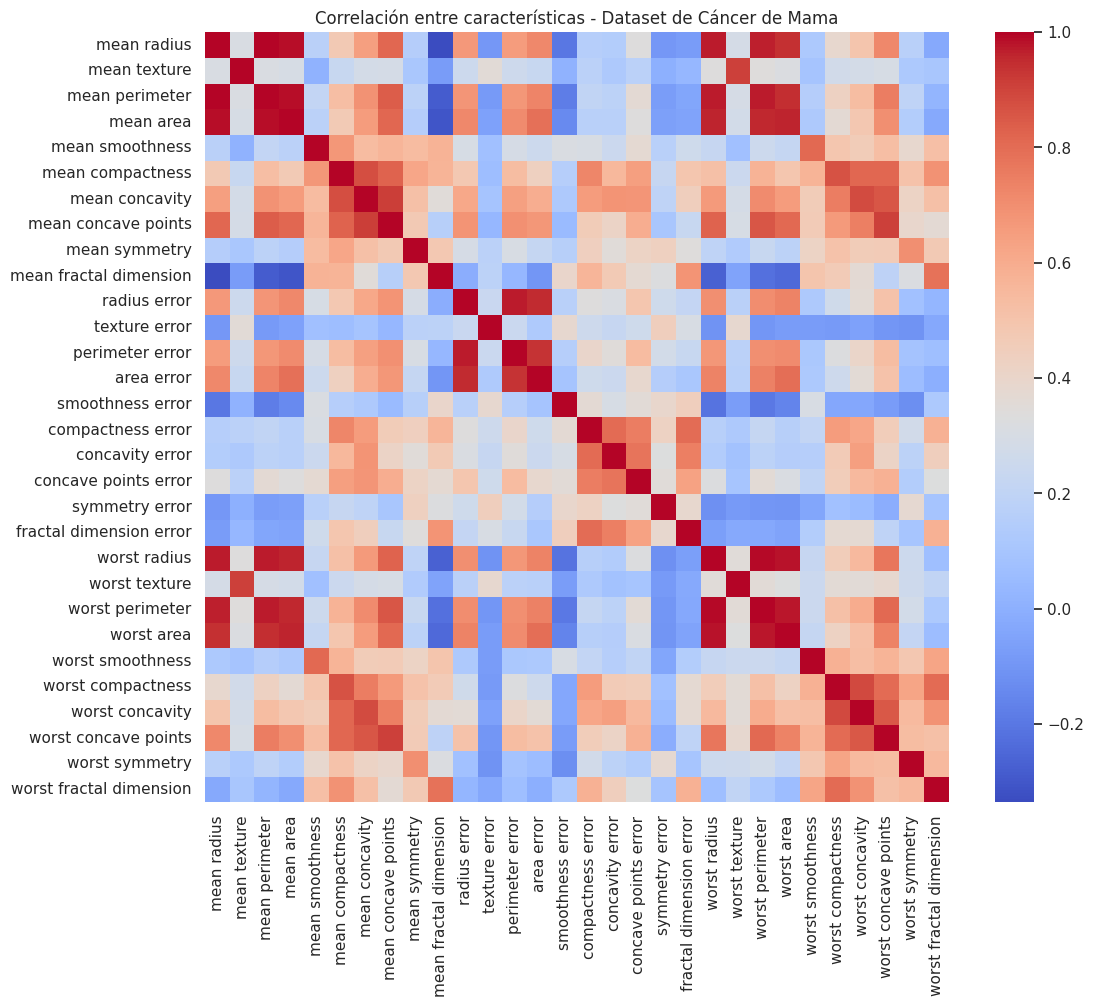

MSE para regresión lineal (California Housing): 0.5558915986952444


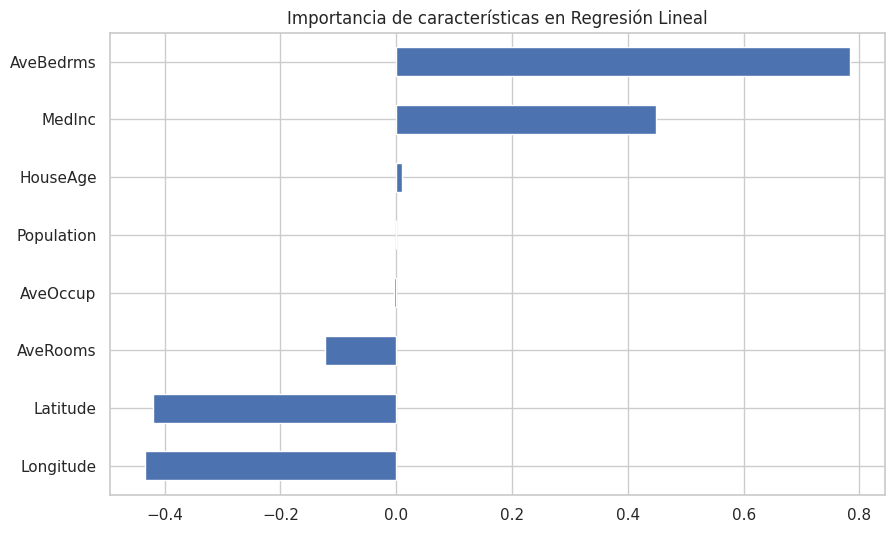

Accuracy para regresión logística (Cáncer de Mama): 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



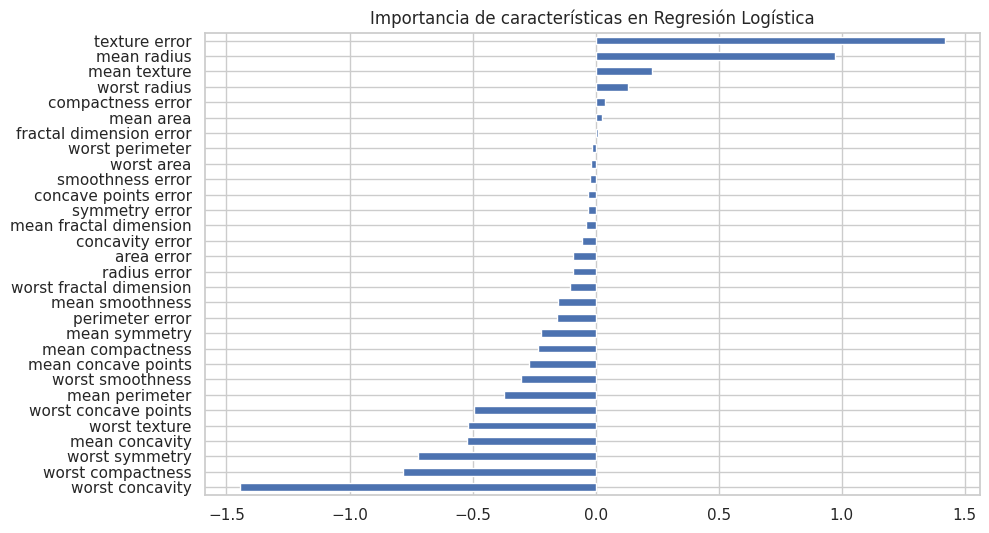

Accuracy para Random Forest (Cáncer de Mama): 0.9649122807017544


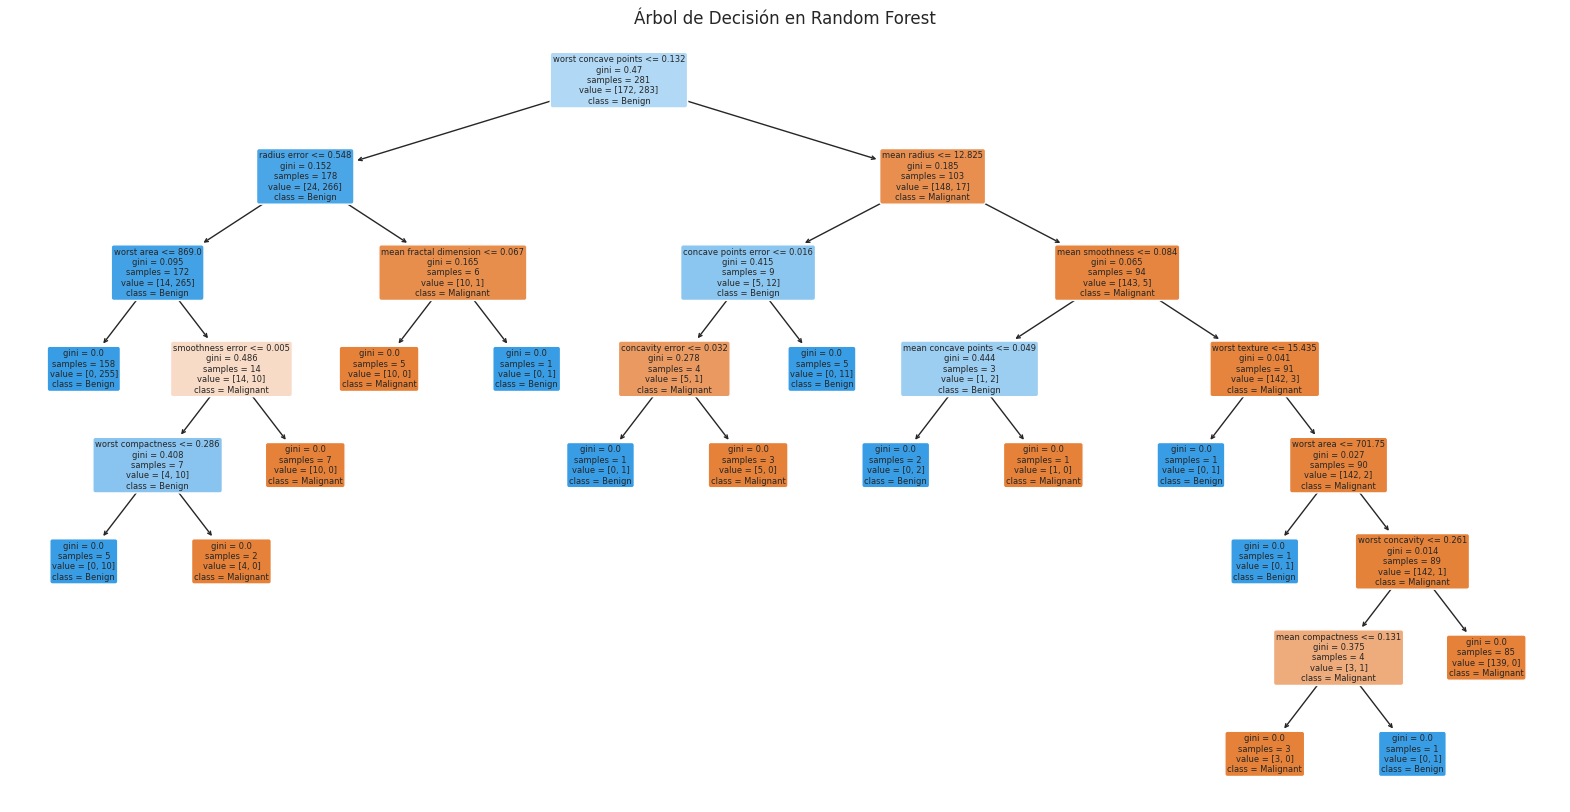

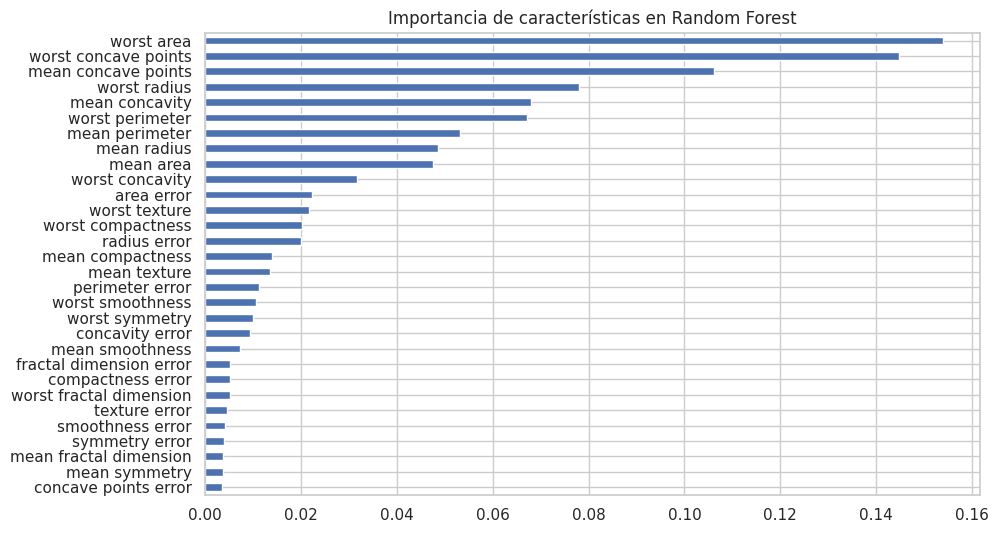

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:37:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy para XGBoost (Cáncer de Mama): 0.956140350877193


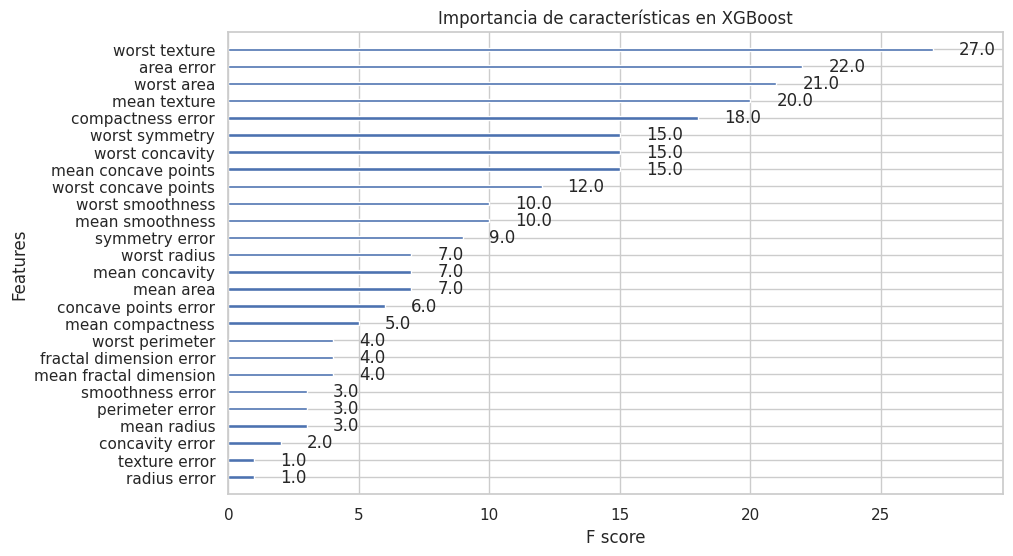

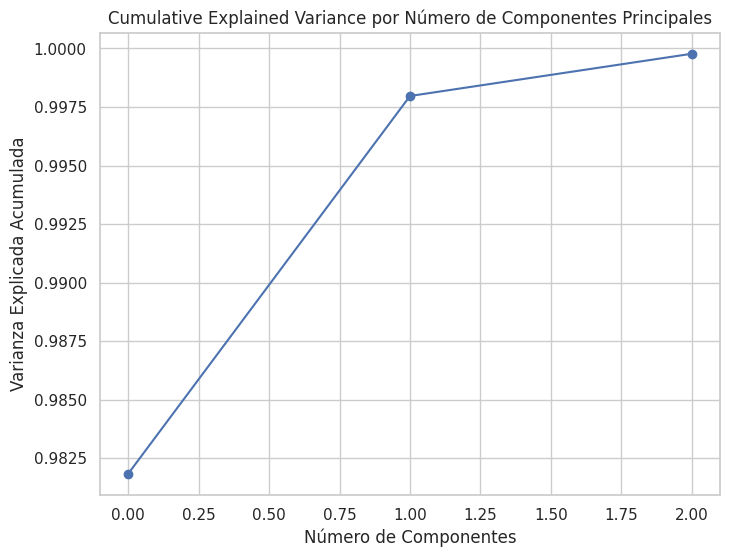

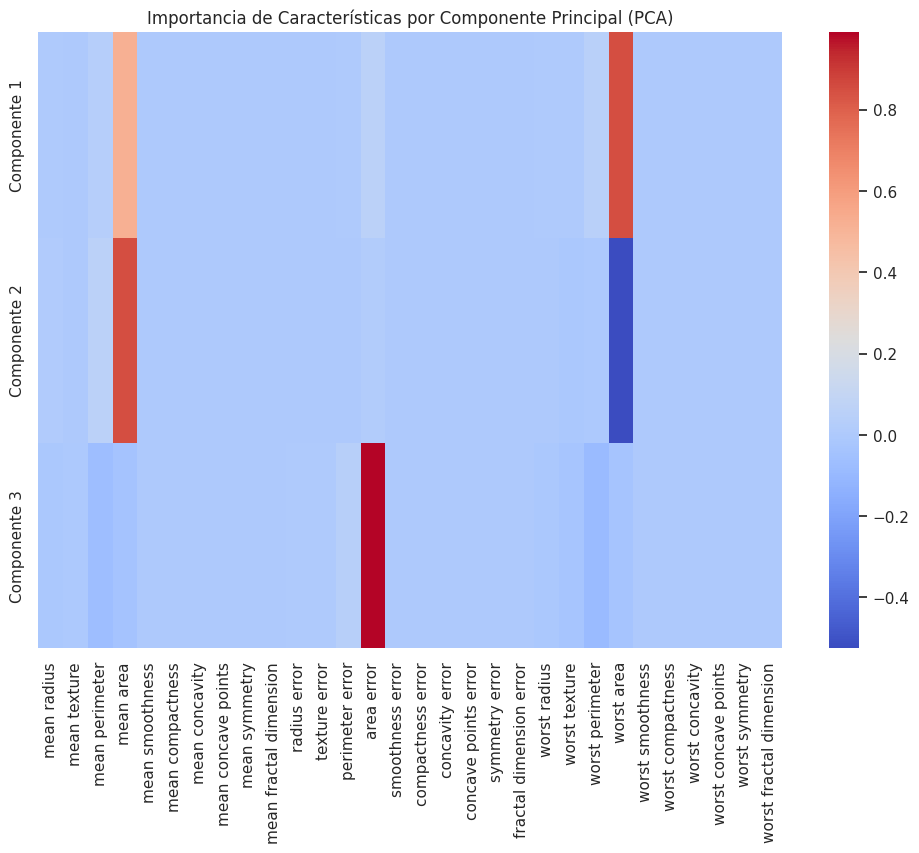

<Figure size 1200x800 with 0 Axes>

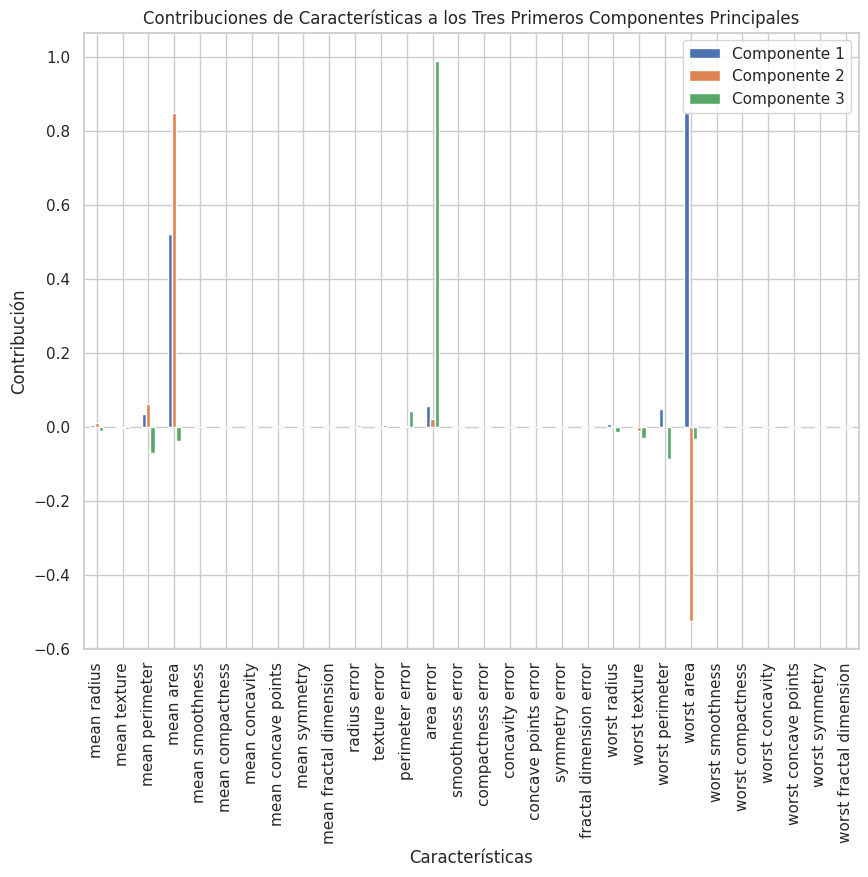

In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier, plot_importance
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
import shap

# Configuración para visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Cargar datasets
# Para regresión usaremos el dataset de California Housing
california = fetch_california_housing()
X_california = pd.DataFrame(california.data, columns=california.feature_names)
y_california = pd.Series(california.target, name='target')

# Para clasificación usaremos el dataset de Cáncer de Mama
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = pd.Series(cancer.target, name='target')

# 2. Dividir los datasets en conjunto de entrenamiento y prueba
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# 3. Evaluar la correlación entre características
plt.figure(figsize=(12, 10))
sns.heatmap(X_train_california.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre características - Dataset de California Housing')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(X_train_cancer.corr(), annot=False, cmap='coolwarm')
plt.title('Correlación entre características - Dataset de Cáncer de Mama')
plt.show()

# 4. Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_california, y_train_california)
y_pred_california = lin_reg.predict(X_test_california)
mse = mean_squared_error(y_test_california, y_pred_california)
print(f"MSE para regresión lineal (California Housing): {mse}")

# Visualización de coeficientes
coefficients = pd.Series(lin_reg.coef_, index=X_train_california.columns)
coefficients.sort_values().plot(kind='barh')
plt.title('Importancia de características en Regresión Lineal')
plt.show()

# 5. Regresión Logística
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_cancer, y_train_cancer)
y_pred_cancer = log_reg.predict(X_test_cancer)
acc = accuracy_score(y_test_cancer, y_pred_cancer)
print(f"Accuracy para regresión logística (Cáncer de Mama): {acc}")
print(classification_report(y_test_cancer, y_pred_cancer))

# Visualización de coeficientes
coefficients = pd.Series(log_reg.coef_[0], index=X_train_cancer.columns)
coefficients.sort_values().plot(kind='barh')
plt.title('Importancia de características en Regresión Logística')
plt.show()

# 6. Árbol de Decisión y Random Forest
# Clasificación con Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_cancer, y_train_cancer)
y_pred_rf_cancer = rf_clf.predict(X_test_cancer)
acc_rf = accuracy_score(y_test_cancer, y_pred_rf_cancer)
print(f"Accuracy para Random Forest (Cáncer de Mama): {acc_rf}")

# Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rf_clf.estimators_[0], feature_names=X_train_cancer.columns, filled=True, rounded=True, class_names=['Malignant', 'Benign'])
plt.title('Árbol de Decisión en Random Forest')
plt.show()

# Importancia de características en Random Forest
importances_rf = pd.Series(rf_clf.feature_importances_, index=X_train_cancer.columns)
importances_rf.sort_values().plot(kind='barh')
plt.title('Importancia de características en Random Forest')
plt.show()

# 7. XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_cancer, y_train_cancer)
y_pred_xgb_cancer = xgb_clf.predict(X_test_cancer)
acc_xgb = accuracy_score(y_test_cancer, y_pred_xgb_cancer)
print(f"Accuracy para XGBoost (Cáncer de Mama): {acc_xgb}")

# Importancia de características en XGBoost
plot_importance(xgb_clf)
plt.title('Importancia de características en XGBoost')
plt.show()

# 8. PCA para la importancia de características con 3 componentes principales
pca = PCA(n_components=3)  # Limitar a 3 componentes principales #USANDO 3 COMPONENTES PRINCIPALES.
X_pca = pca.fit_transform(X_train_cancer)

# Gráfica de Varianza Explicada
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance por Número de Componentes Principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Importancia de características por componente principal
pca_components = pd.DataFrame(pca.components_, columns=X_train_cancer.columns)
pca_components.index = [f'Componente {i+1}' for i in range(len(pca_components))]

# Gráfico de Importancia de Características por Componente Principal
plt.figure(figsize=(12, 8))
sns.heatmap(pca_components, cmap='coolwarm', fmt=".2f")
plt.title('Importancia de Características por Componente Principal (PCA)')
plt.show()

# Visualizar contribuciones de las características a los tres componentes principales
plt.figure(figsize=(12, 8))
pca_components.T.plot(kind='bar', figsize=(10, 8))
plt.title('Contribuciones de Características a los Tres Primeros Componentes Principales')
plt.xlabel('Características')
plt.ylabel('Contribución')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df.drop(columns=['','',''], inplace=True)  #con esta función borro.

#### CORRELACIONES LINEALES Y NO LINEALES

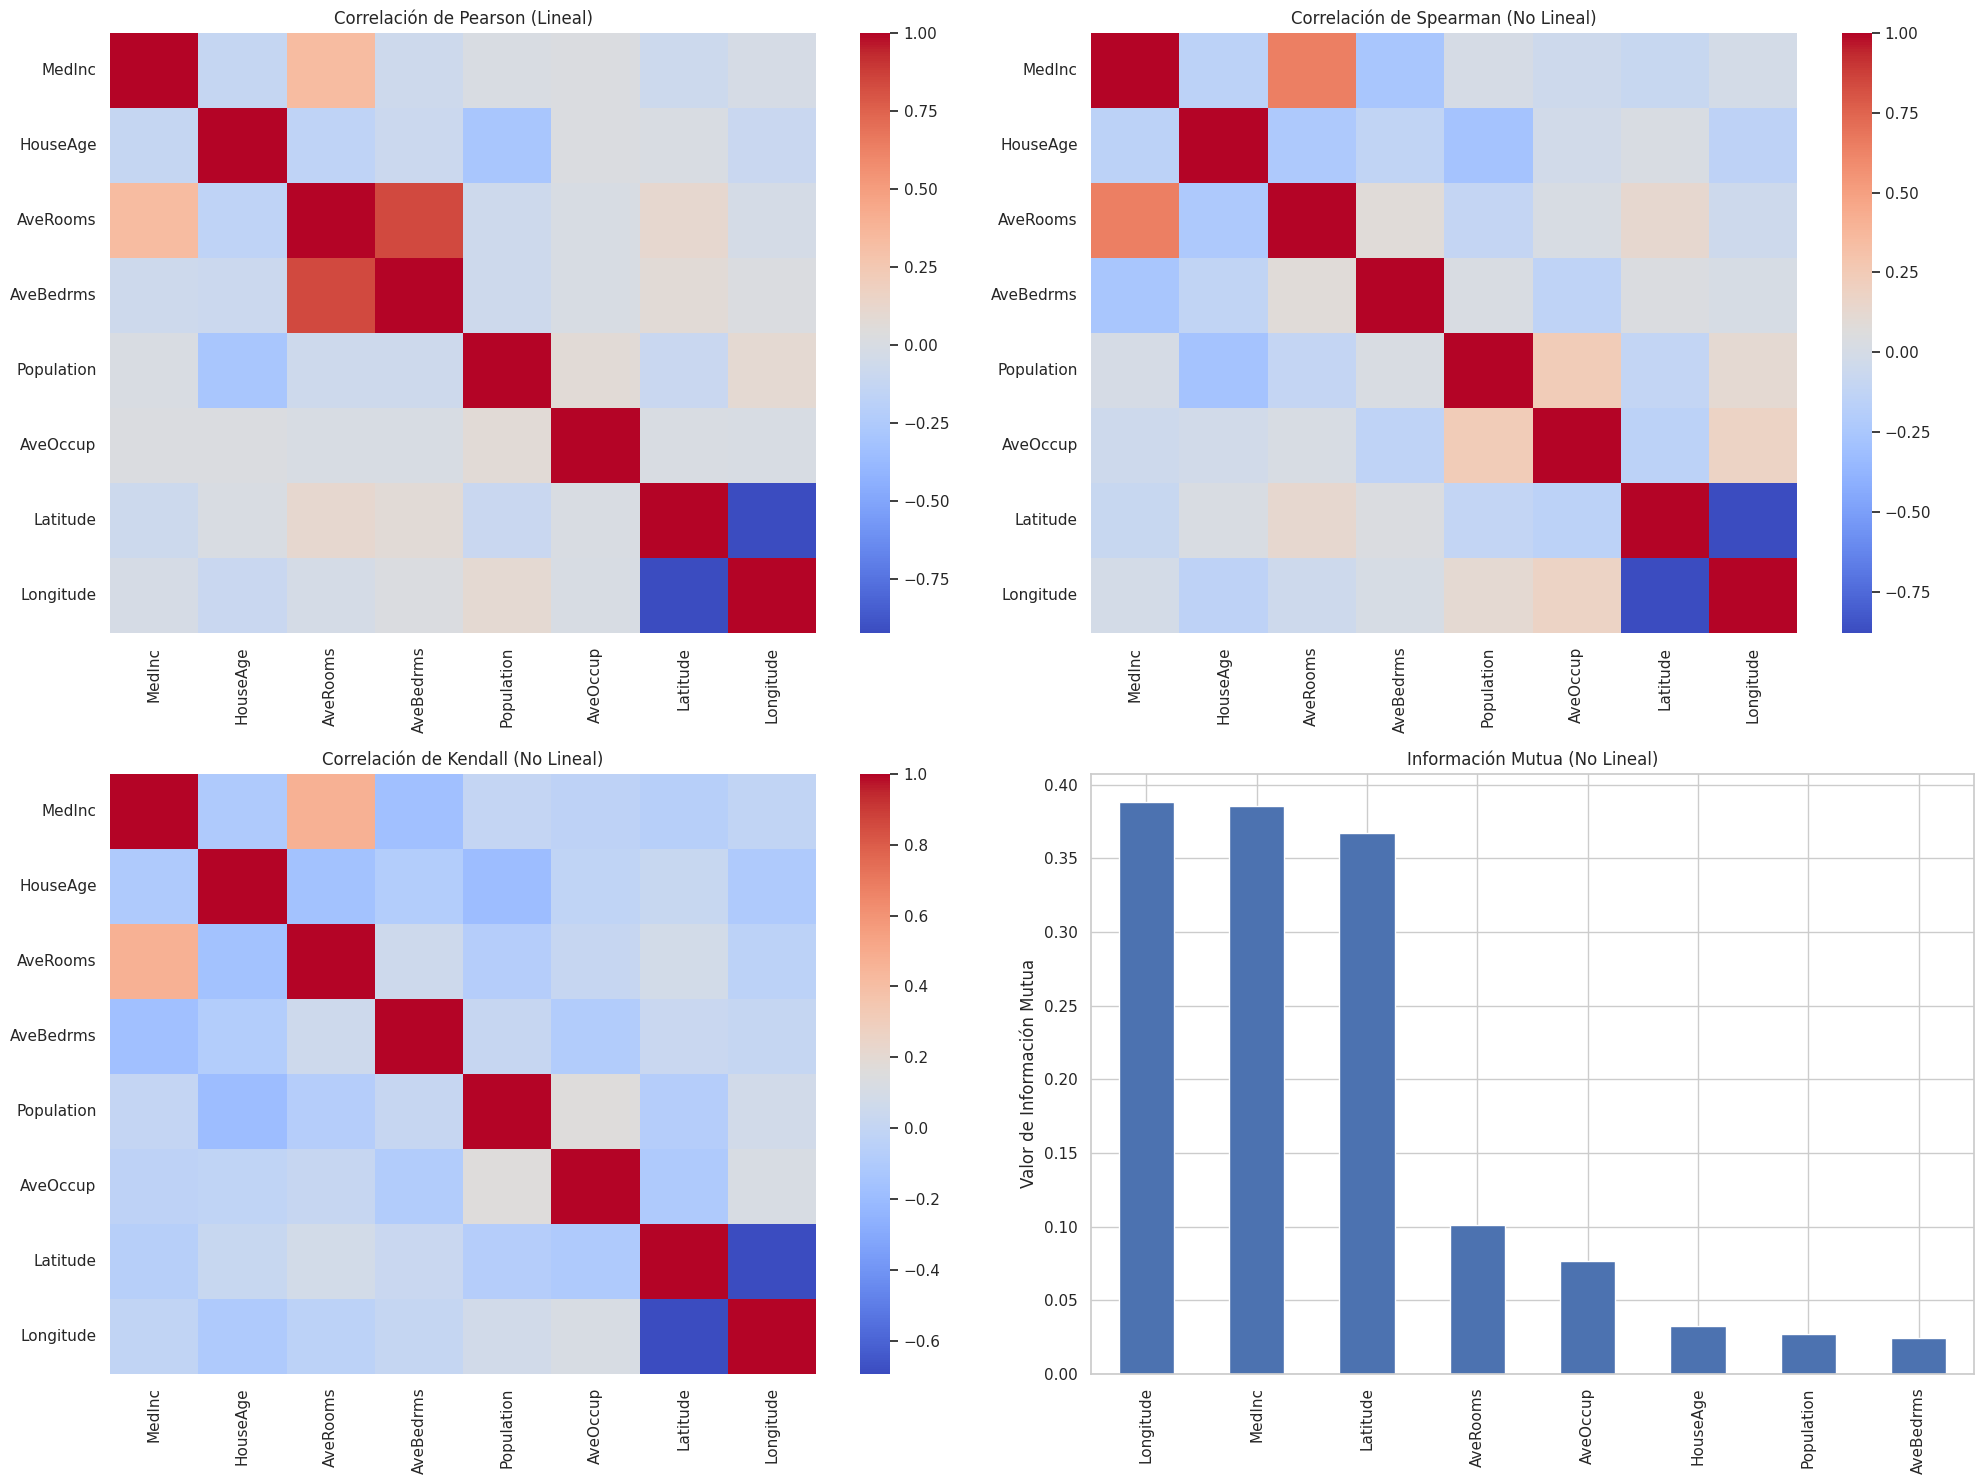

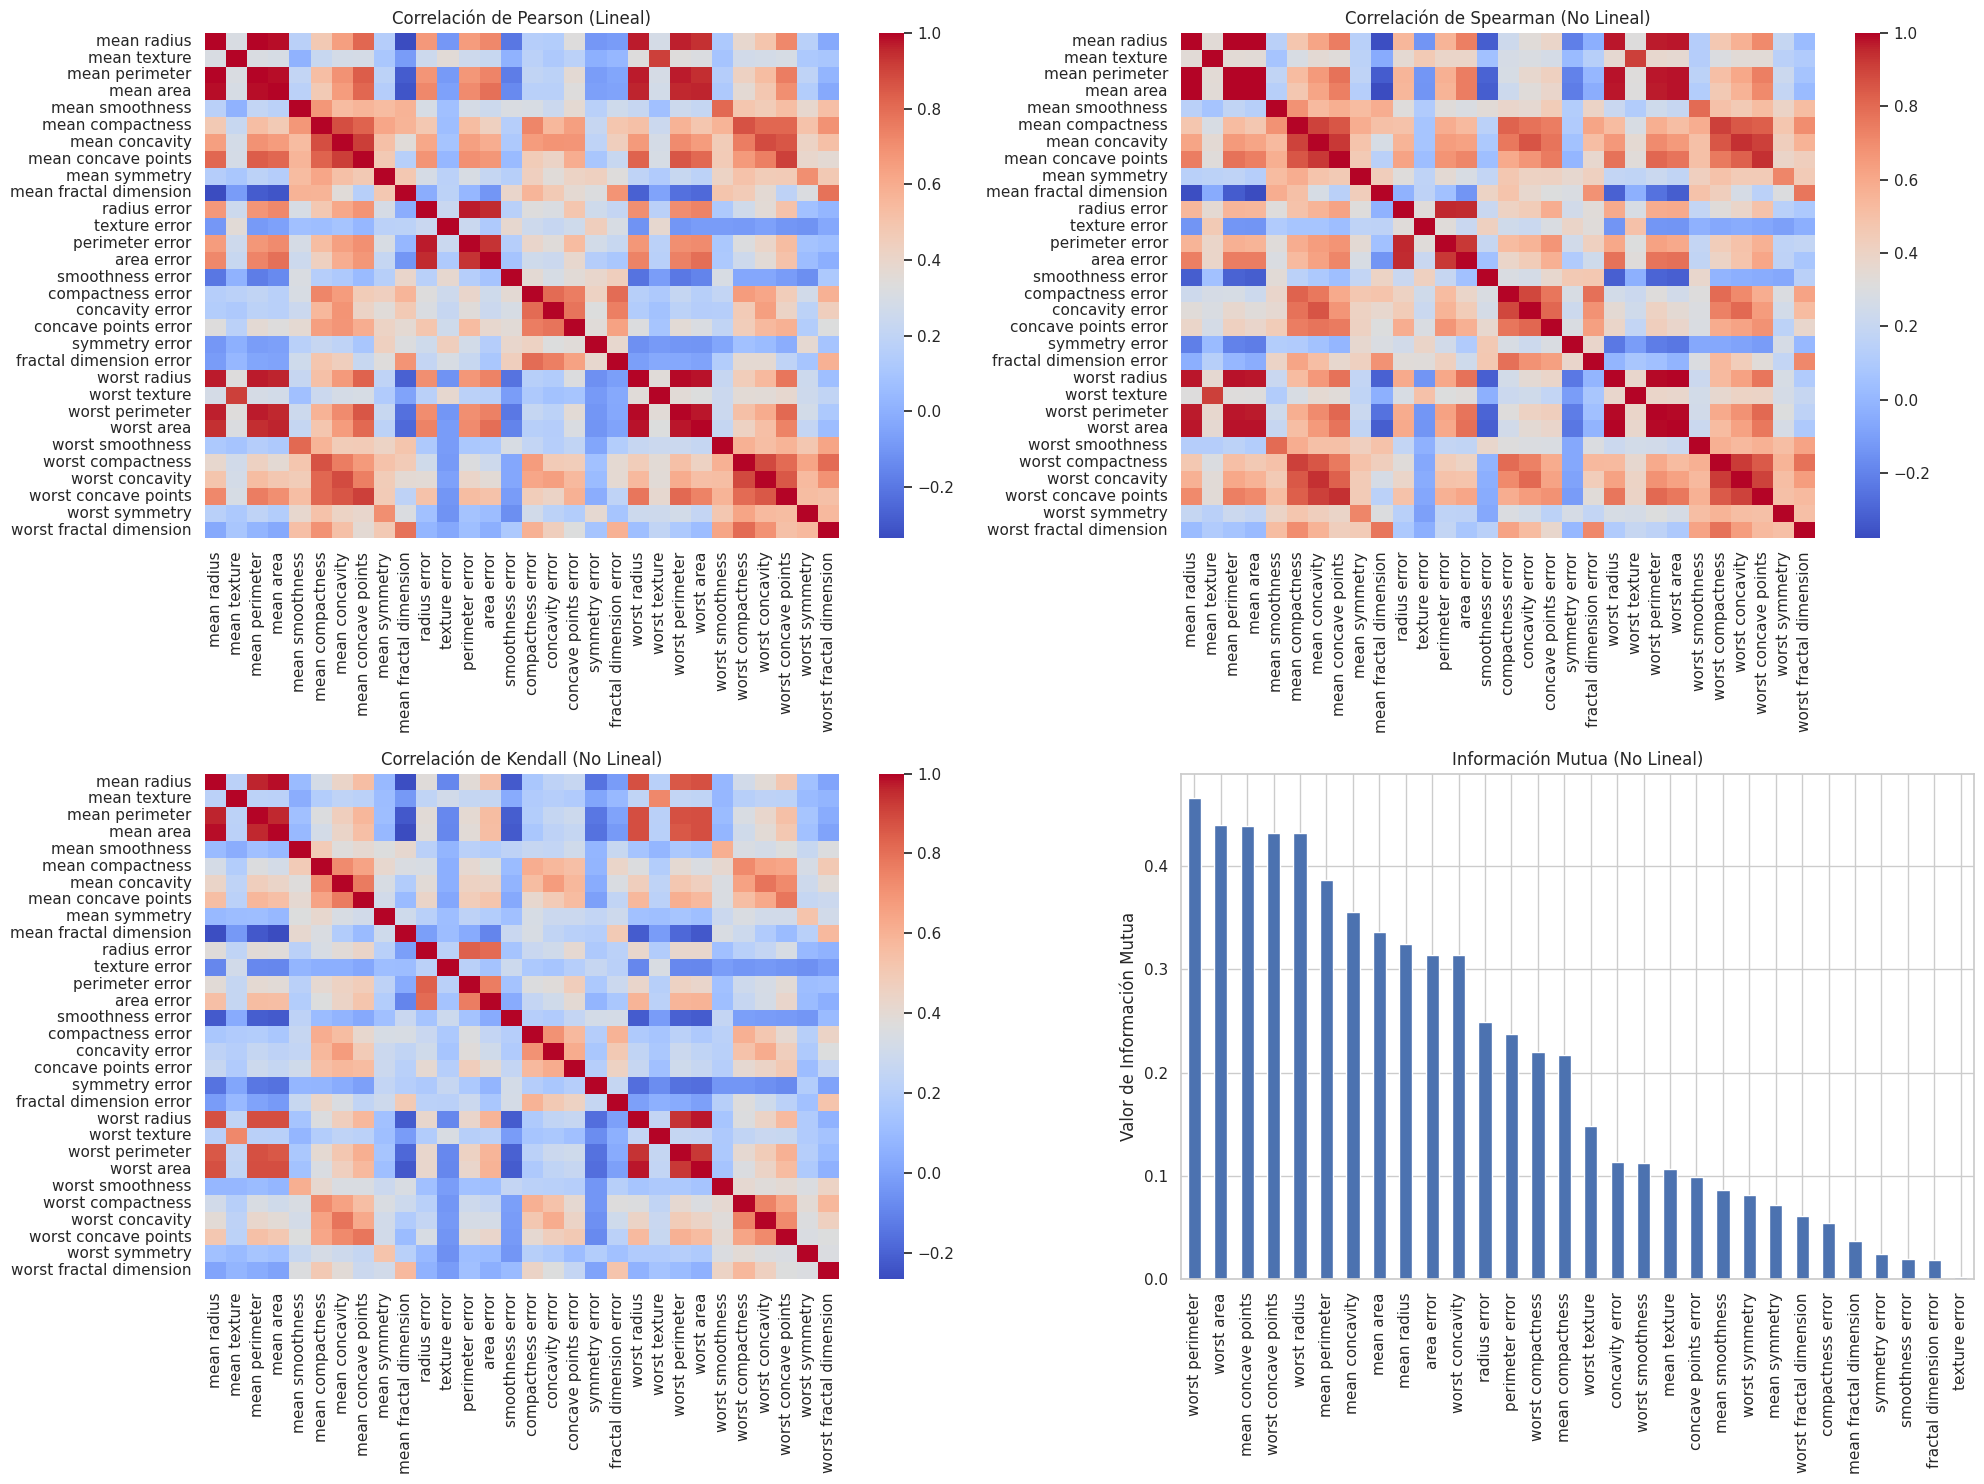

In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier, plot_importance
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
import shap

# Configuración para visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Cargar datasets
# Para regresión usaremos el dataset de California Housing
california = fetch_california_housing()
X_california = pd.DataFrame(california.data, columns=california.feature_names)
y_california = pd.Series(california.target, name='target')

# Para clasificación usaremos el dataset de Cáncer de Mama
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = pd.Series(cancer.target, name='target')

# 2. Dividir los datasets en conjunto de entrenamiento y prueba
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# 3. Análisis de correlación lineal y no lineal
def plot_correlation_analysis(X, y, task_type='regression'):
    """
    Función para visualizar diferentes métodos de correlación, incluyendo métodos lineales y no lineales.
    """
    plt.figure(figsize=(20, 15))

    # Correlación de Pearson (lineal)
    plt.subplot(2, 2, 1)
    corr_matrix = X.corr(method='pearson')
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title('Correlación de Pearson (Lineal)')

    # Correlación de Spearman (monótona, no lineal)
    plt.subplot(2, 2, 2)
    spearman_corr = X.corr(method='spearman')
    sns.heatmap(spearman_corr, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title('Correlación de Spearman (No Lineal)')

    # Correlación de Kendall (monótona, no lineal)
    plt.subplot(2, 2, 3)
    kendall_corr = X.corr(method='kendall')
    sns.heatmap(kendall_corr, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title('Correlación de Kendall (No Lineal)')

    # Información mutua (no lineal)
    plt.subplot(2, 2, 4)
    if task_type == 'regression':
        mi = mutual_info_regression(X, y)
    else:
        mi = mutual_info_classif(X, y)
    mi_series = pd.Series(mi, index=X.columns)
    mi_series.sort_values(ascending=False).plot(kind='bar')
    plt.title('Información Mutua (No Lineal)')
    plt.ylabel('Valor de Información Mutua')

    plt.tight_layout()
    plt.show()

# Análisis de correlación para California Housing (Regresión)
plot_correlation_analysis(X_train_california, y_train_california, task_type='regression')

# Análisis de correlación para el Cáncer de Mama (Clasificación)
plot_correlation_analysis(X_train_cancer, y_train_cancer, task_type='classification')




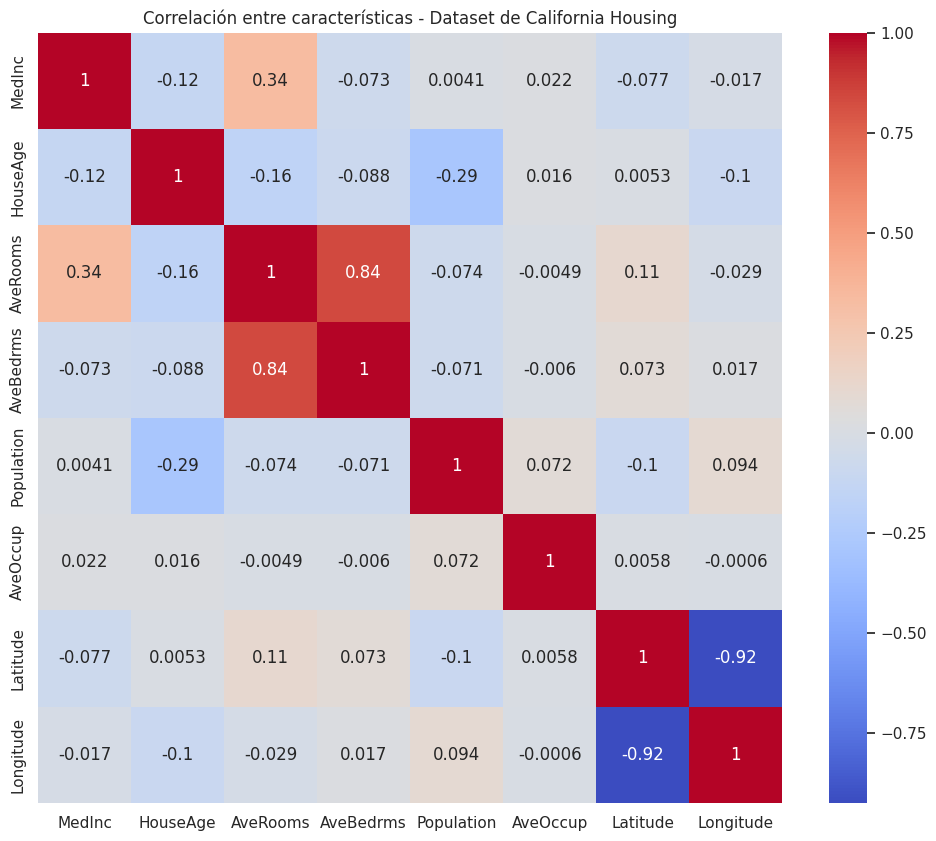

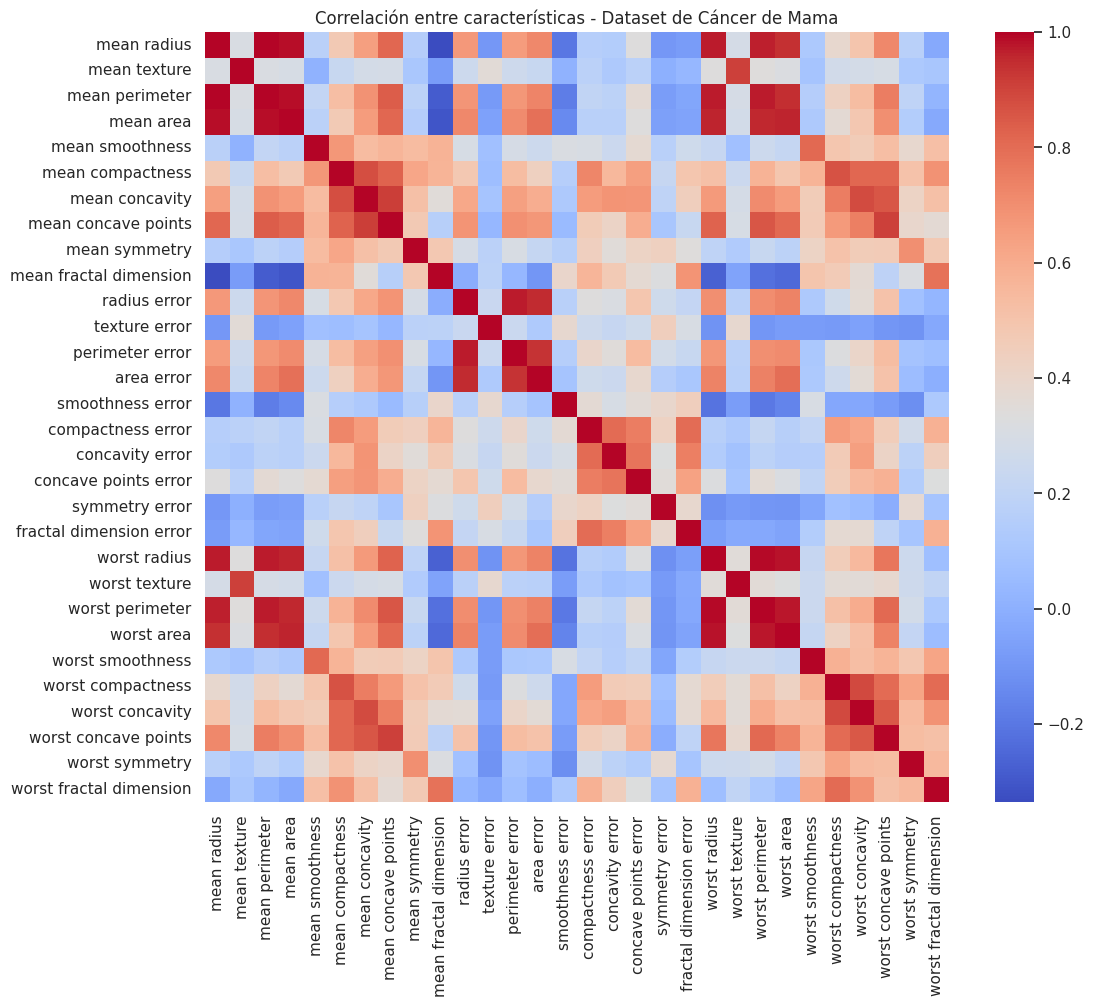

MSE para regresión lineal (California Housing): 0.5558915986952444


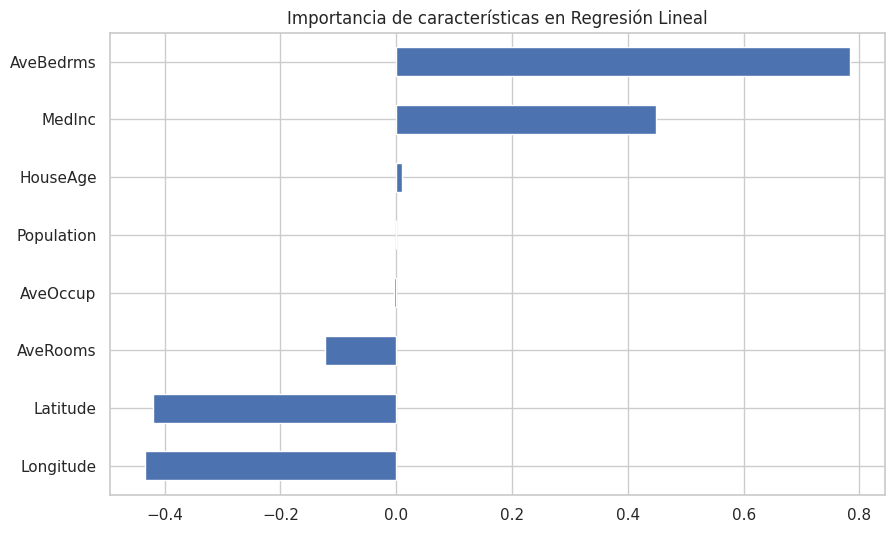

Accuracy para regresión logística (Cáncer de Mama): 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



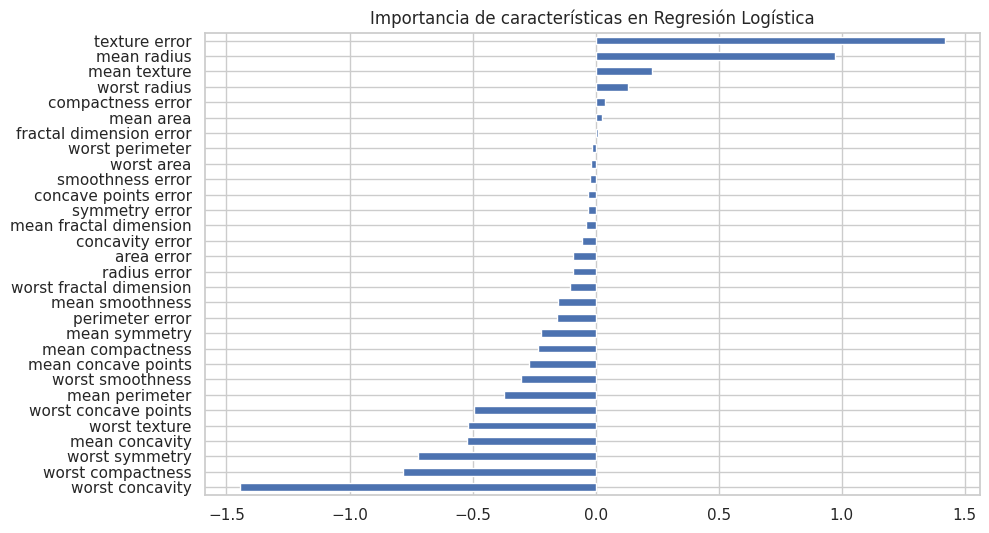

Accuracy para Random Forest (Cáncer de Mama): 0.9649122807017544


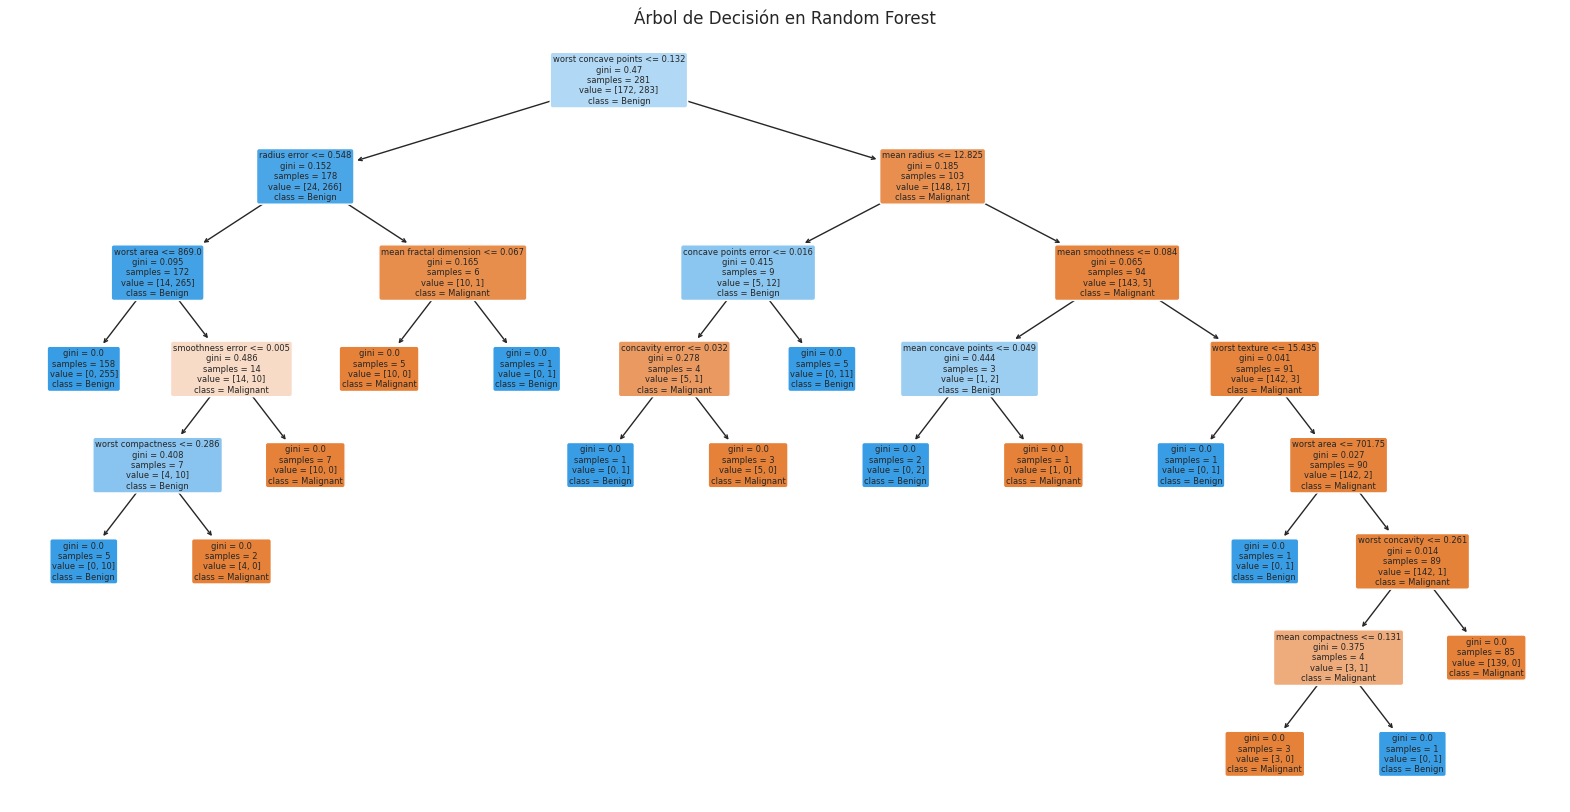

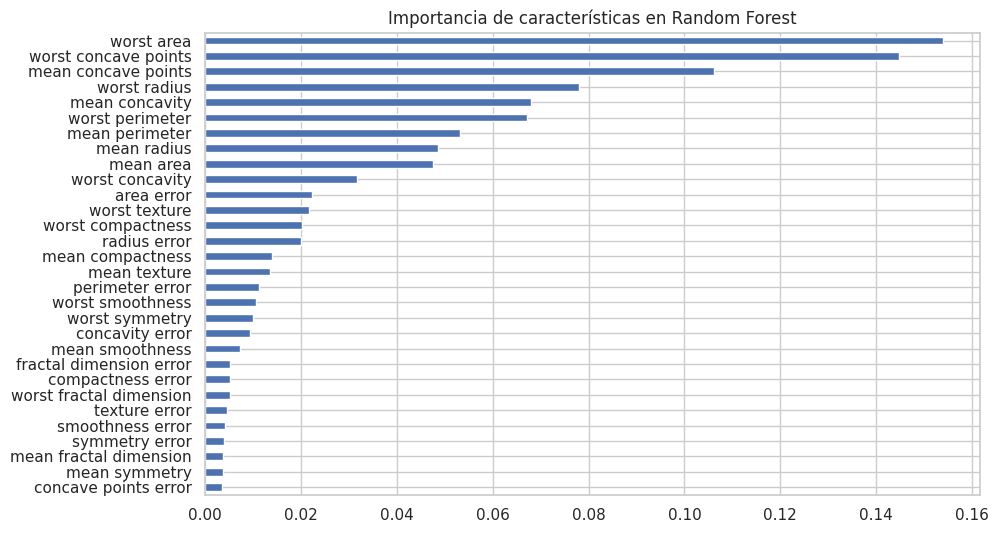

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:19:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy para XGBoost (Cáncer de Mama): 0.956140350877193


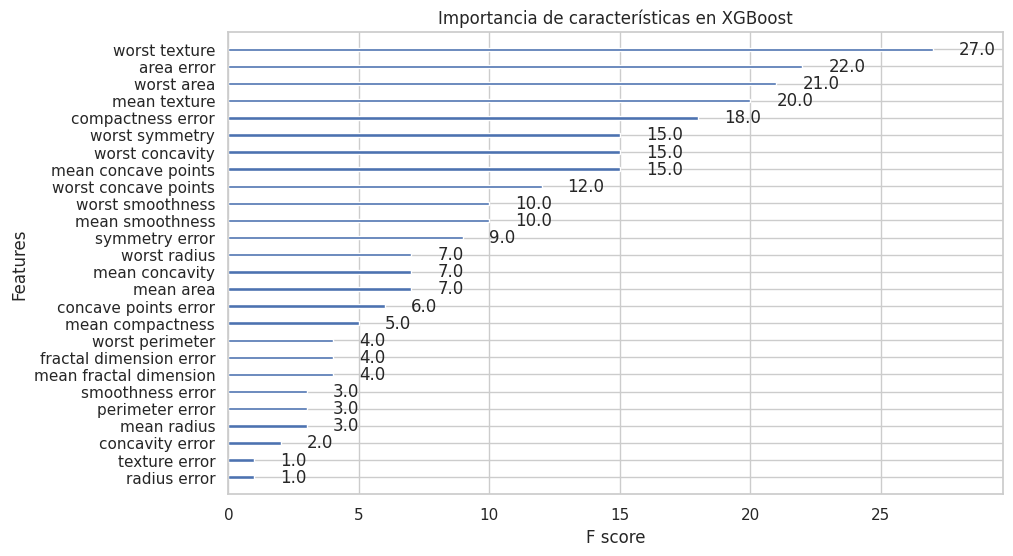

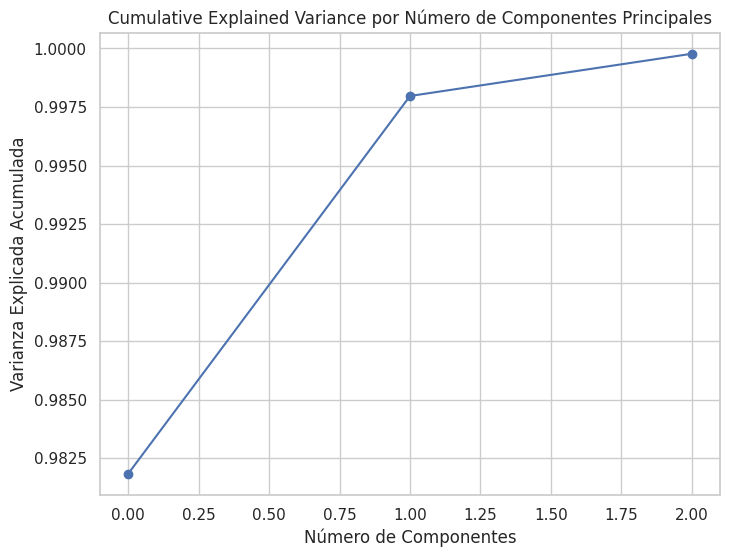

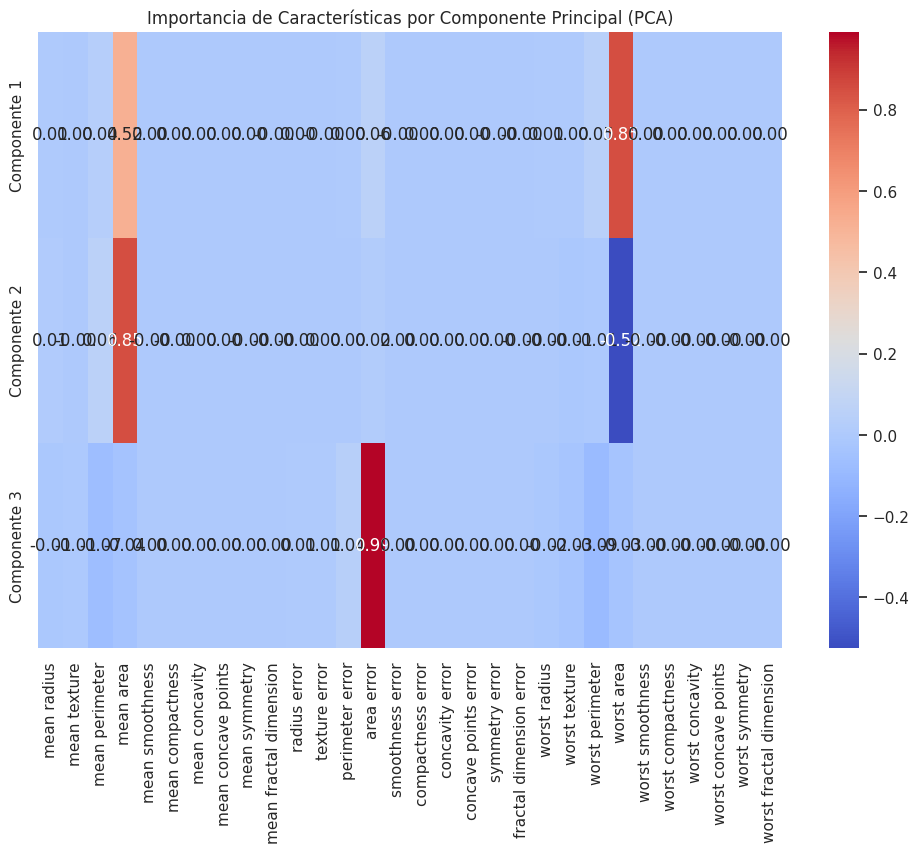

<Figure size 1200x800 with 0 Axes>

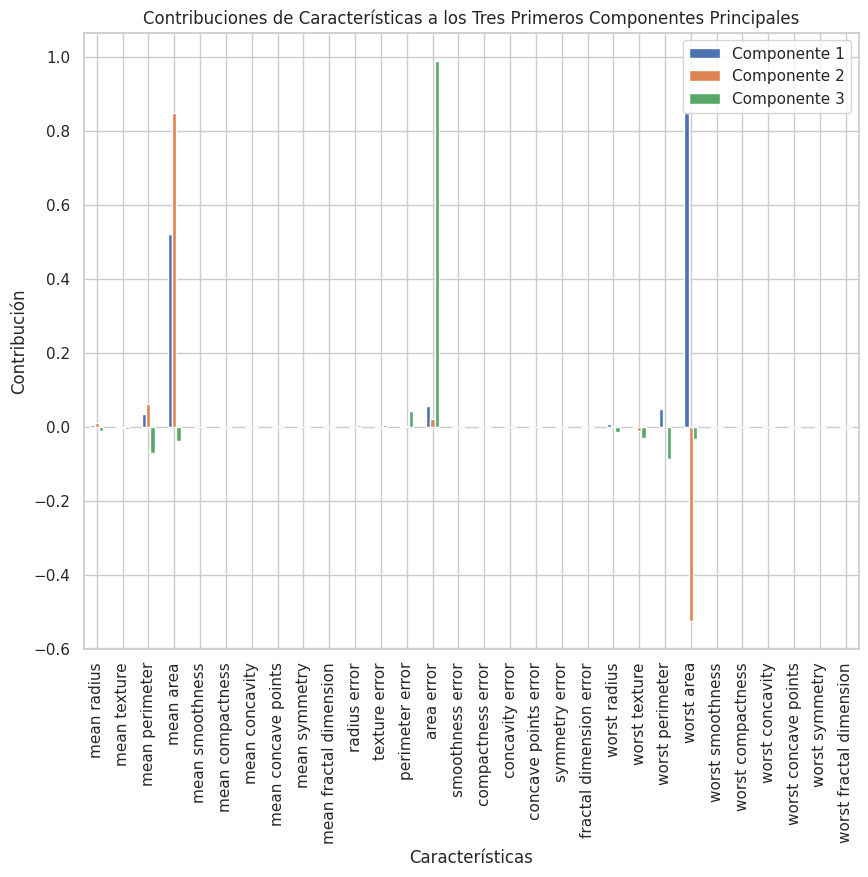

In [ ]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier, plot_importance
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
import shap

# Configuración para visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Cargar datasets
# Para regresión usaremos el dataset de California Housing
california = fetch_california_housing()
X_california = pd.DataFrame(california.data, columns=california.feature_names)
y_california = pd.Series(california.target, name='target')

# Para clasificación usaremos el dataset de Cáncer de Mama
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = pd.Series(cancer.target, name='target')

# 2. Dividir los datasets en conjunto de entrenamiento y prueba
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# 3. Evaluar la correlación entre características
plt.figure(figsize=(12, 10))
sns.heatmap(X_train_california.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre características - Dataset de California Housing')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(X_train_cancer.corr(), annot=False, cmap='coolwarm')
plt.title('Correlación entre características - Dataset de Cáncer de Mama')
plt.show()

# 4. Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_california, y_train_california)
y_pred_california = lin_reg.predict(X_test_california)
mse = mean_squared_error(y_test_california, y_pred_california)
print(f"MSE para regresión lineal (California Housing): {mse}")

# Visualización de coeficientes
coefficients = pd.Series(lin_reg.coef_, index=X_train_california.columns)
coefficients.sort_values().plot(kind='barh')
plt.title('Importancia de características en Regresión Lineal')
plt.show()

# 5. Regresión Logística
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_cancer, y_train_cancer)
y_pred_cancer = log_reg.predict(X_test_cancer)
acc = accuracy_score(y_test_cancer, y_pred_cancer)
print(f"Accuracy para regresión logística (Cáncer de Mama): {acc}")
print(classification_report(y_test_cancer, y_pred_cancer))

# Visualización de coeficientes
coefficients = pd.Series(log_reg.coef_[0], index=X_train_cancer.columns)
coefficients.sort_values().plot(kind='barh')
plt.title('Importancia de características en Regresión Logística')
plt.show()

# 6. Árbol de Decisión y Random Forest
# Clasificación con Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_cancer, y_train_cancer)
y_pred_rf_cancer = rf_clf.predict(X_test_cancer)
acc_rf = accuracy_score(y_test_cancer, y_pred_rf_cancer)
print(f"Accuracy para Random Forest (Cáncer de Mama): {acc_rf}")

# Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rf_clf.estimators_[0], feature_names=X_train_cancer.columns, filled=True, rounded=True, class_names=['Malignant', 'Benign'])
plt.title('Árbol de Decisión en Random Forest')
plt.show()

# Importancia de características en Random Forest
importances_rf = pd.Series(rf_clf.feature_importances_, index=X_train_cancer.columns)
importances_rf.sort_values().plot(kind='barh')
plt.title('Importancia de características en Random Forest')
plt.show()

# 7. XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_cancer, y_train_cancer)
y_pred_xgb_cancer = xgb_clf.predict(X_test_cancer)
acc_xgb = accuracy_score(y_test_cancer, y_pred_xgb_cancer)
print(f"Accuracy para XGBoost (Cáncer de Mama): {acc_xgb}")

# Importancia de características en XGBoost
plot_importance(xgb_clf)
plt.title('Importancia de características en XGBoost')
plt.show()

# 8. PCA para la importancia de características con 3 componentes principales
pca = PCA(n_components=3)  # Limitar a 3 componentes principales
X_pca = pca.fit_transform(X_train_cancer)

# Gráfica de Varianza Explicada
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance por Número de Componentes Principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Importancia de características por componente principal
pca_components = pd.DataFrame(pca.components_, columns=X_train_cancer.columns)
pca_components.index = [f'Componente {i+1}' for i in range(len(pca_components))]

# Gráfico de Importancia de Características por Componente Principal
plt.figure(figsize=(12, 8))
sns.heatmap(pca_components, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Importancia de Características por Componente Principal (PCA)')
plt.show()

# Visualizar contribuciones de las características a los tres componentes principales
plt.figure(figsize=(12, 8))
pca_components.T.plot(kind='bar', figsize=(10, 8))
plt.title('Contribuciones de Características a los Tres Primeros Componentes Principales')
plt.xlabel('Características')
plt.ylabel('Contribución')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# 9. SHAP Values
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test_cancer)

# Si es una clasificación binaria, utilizaremos la clase positiva (índice 1)
if len(shap_values) > 1:
    shap_values_to_use = shap_values[1]  # Usar valores SHAP para la clase positiva
    expected_value = explainer.expected_value[1]
else:
    shap_values_to_use = shap_values  # Para problemas de regresión o una sola clase
    expected_value = explainer.expected_value

# Verificamos la forma de shap_values y de X_test_cancer
print("Forma de shap_values_to_use:", np.array(shap_values_to_use).shape)  # Debe ser (n_samples, n_features)
print("Forma de X_test_cancer:", X_test_cancer.shape)  # (n_samples, n_features)

# Aseguramos que shap_values_to_use tenga la forma correcta para summary_plot
# shap_values_to_use debe tener la forma (n_samples, n_features)
if shap_values_to_use.ndim == 3:
    # Si tenemos un tensor con una dimensión extra, seleccionamos la clase de interés
    shap_values_to_use = shap_values_to_use[1]  # Usando la clase positiva en este caso

print("Nueva forma de shap_values_to_use:", np.array(shap_values_to_use).shape)

# Resumen SHAP values (para la clase positiva en clasificación binaria)
shap.summary_plot(shap_values_to_use, X_test_cancer, plot_type="bar")

# Visualización de SHAP values para un ejemplo individual
shap.initjs()
shap.force_plot(expected_value, shap_values_to_use[0], X_test_cancer.iloc[0,:])


Forma de shap_values_to_use: (30, 2)
Forma de X_test_cancer: (114, 30)
Nueva forma de shap_values_to_use: (30, 2)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.